<a href="https://colab.research.google.com/github/Noahben47/uzumaki/blob/main/BENALI_Adem_PROJET_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Projet AI BENALI Adem

In [ ]:
#Partie1__Introduction

In [24]:
install.packages(c("ggplot2","dplyr","tidyr","FactoMineR","factoextra","corrplot"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘forecast’, ‘doBy’, ‘pbkrtest’, ‘rstatix’, ‘car’, ‘ggpubr’




In [27]:
# Chargement des librairies nécessaires
library(ggplot2)
library(dplyr)
library(tidyr)
library(FactoMineR)
library(factoextra)
library(corrplot)


Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa

corrplot 0.95 loaded



In [29]:
# Lecture des données
ozone <- read.csv(
  "deptSeuil.csv",
  header = TRUE,
  sep = ",",
  quote = "",
  stringsAsFactors = FALSE
)

# Premières lignes du jeu de données
head(ozone)
# Vérification du contenu
summary(ozone)



,X...JOUR..,X..O3obs..,X..MOCAGE..,X..TEMPE..,X..RMH2O..,X..NO2..,X..NO..,X..STATION..,X..VentMOD..,X..VentANG...
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
1,1,91,93.2,21.5,0.00847,1.602,0.424,Aix,9.5000,-0.64350
2,1,100,104.6,20.2,0.00881,2.121,0.531,Aix,8.0100,-0.04996
3,0,82,103.6,17.4,0.00951,1.657,0.467,Aix,9.3771,-0.12832
4,0,94,94.8,18.8,0.00855,2.350,0.701,Aix,9.4578,-0.34516
5,0,107,99.0,23.7,0.00731,1.653,0.452,Aix,7.8791,-0.41822
6,0,150,114.3,23.6,0.01182,5.316,1.343,Aix,6.3127,0.06341


   X...JOUR..       X..O3obs..     X..MOCAGE..      X..TEMPE..   
 Min.   :0.0000   Min.   : 19.0   Min.   : 46.4   Min.   :10.40  
 1st Qu.:0.0000   1st Qu.: 87.0   1st Qu.: 97.5   1st Qu.:20.20  
 Median :0.0000   Median :109.0   Median :125.6   Median :23.80  
 Mean   :0.3045   Mean   :115.4   Mean   :127.2   Mean   :23.88  
 3rd Qu.:1.0000   3rd Qu.:135.0   3rd Qu.:153.6   3rd Qu.:27.60  
 Max.   :1.0000   Max.   :319.0   Max.   :284.7   Max.   :38.00  
   X..RMH2O..         X..NO2..         X..NO..       X..STATION..      
 Min.   :0.00285   Min.   : 0.258   Min.   :0.0010   Length:1041       
 1st Qu.:0.00763   1st Qu.: 1.248   1st Qu.:0.2360   Class :character  
 Median :0.00985   Median : 2.109   Median :0.3880   Mode  :character  
 Mean   :0.01025   Mean   : 3.505   Mean   :0.6574                     
 3rd Qu.:0.01244   3rd Qu.: 4.062   3rd Qu.:0.7440                     
 Max.   :0.02753   Max.   :44.396   Max.   :9.4290                     
  X..VentMOD..     X..VentANG...  

In [30]:
names(ozone) <- c(
  "JOUR",
  "O3obs",
  "MOCAGE",
  "TEMPE",
  "RMH2O",
  "NO2",
  "NO",
  "STATION",
  "VentMOD",
  "VentANG"
)

names(ozone)


[1] "JOUR"    "O3obs"   "MOCAGE"  "TEMPE"   "RMH2O"   "NO2"     "NO"     
 [8] "STATION" "VentMOD" "VentANG"

In [31]:
# Changement du type des variables qualitatives en facteur
ozone[, "JOUR"] <- as.factor(ozone[, "JOUR"])
ozone[, "STATION"] <- as.factor(ozone[, "STATION"])


In [32]:
# Vérification dans le summary
summary(ozone)

 JOUR        O3obs           MOCAGE          TEMPE           RMH2O        
 0:724   Min.   : 19.0   Min.   : 46.4   Min.   :10.40   Min.   :0.00285  
 1:317   1st Qu.: 87.0   1st Qu.: 97.5   1st Qu.:20.20   1st Qu.:0.00763  
         Median :109.0   Median :125.6   Median :23.80   Median :0.00985  
         Mean   :115.4   Mean   :127.2   Mean   :23.88   Mean   :0.01025  
         3rd Qu.:135.0   3rd Qu.:153.6   3rd Qu.:27.60   3rd Qu.:0.01244  
         Max.   :319.0   Max.   :284.7   Max.   :38.00   Max.   :0.02753  
      NO2               NO         STATION      VentMOD       
 Min.   : 0.258   Min.   :0.0010   Aix:199   Min.   : 0.1414  
 1st Qu.: 1.248   1st Qu.:0.2360   Als:222   1st Qu.: 3.9623  
 Median : 2.109   Median :0.3880   Cad:202   Median : 5.5973  
 Mean   : 3.505   Mean   :0.6574   Pla:208   Mean   : 5.9072  
 3rd Qu.: 4.062   3rd Qu.:0.7440   Ram:210   3rd Qu.: 7.1063  
 Max.   :44.396   Max.   :9.4290             Max.   :19.8910  
    VentANG       
 Min.   :-1.570

In [ ]:
#Exploration élémentaire

In [ ]:
#1-Statistiques unidimensionnelles

`stat_bin()` using `bins = 30`. Pick better value `binwidth`.
Warning message:
“The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead.”
`stat_bin()` using `bins = 30`. Pick better value `binwidth`.


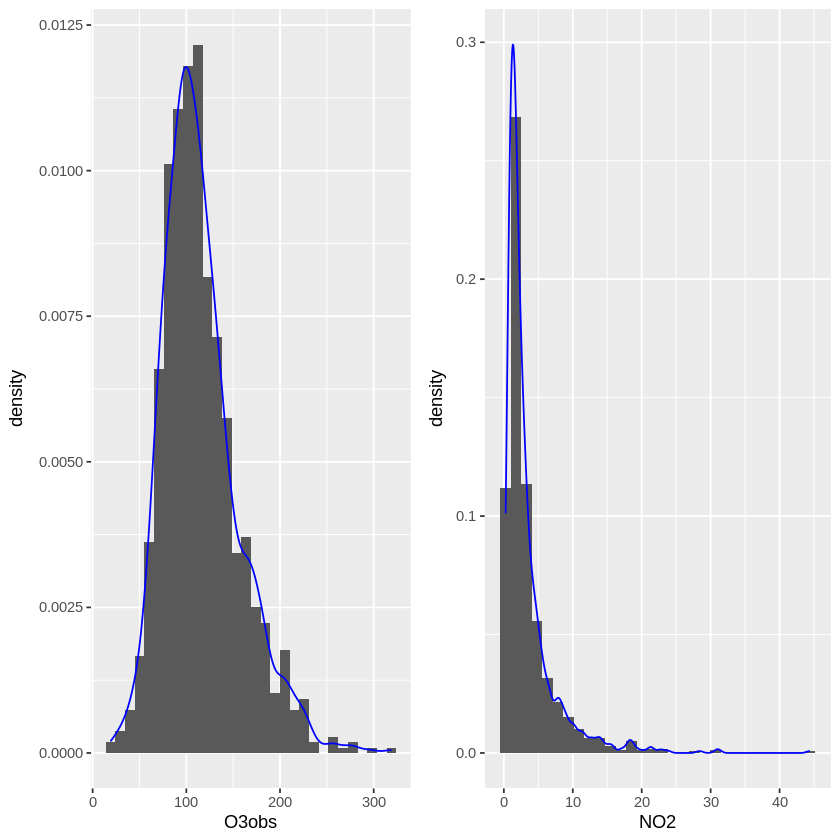

In [33]:
library(ggplot2)
library(gridExtra)
g1<-ggplot(ozone,aes(x=O3obs))+
  geom_histogram(aes(y=after_stat(density)))+
  geom_density(alpha=.2, col="blue")
g2<-ggplot(ozone,aes(x=NO2))+
  geom_histogram(aes(y=..density..))+
  geom_density(alpha=.2, col="blue")

grid.arrange(g1,g2,ncol=2)

`stat_bin()` using `bins = 30`. Pick better value `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value `binwidth`.


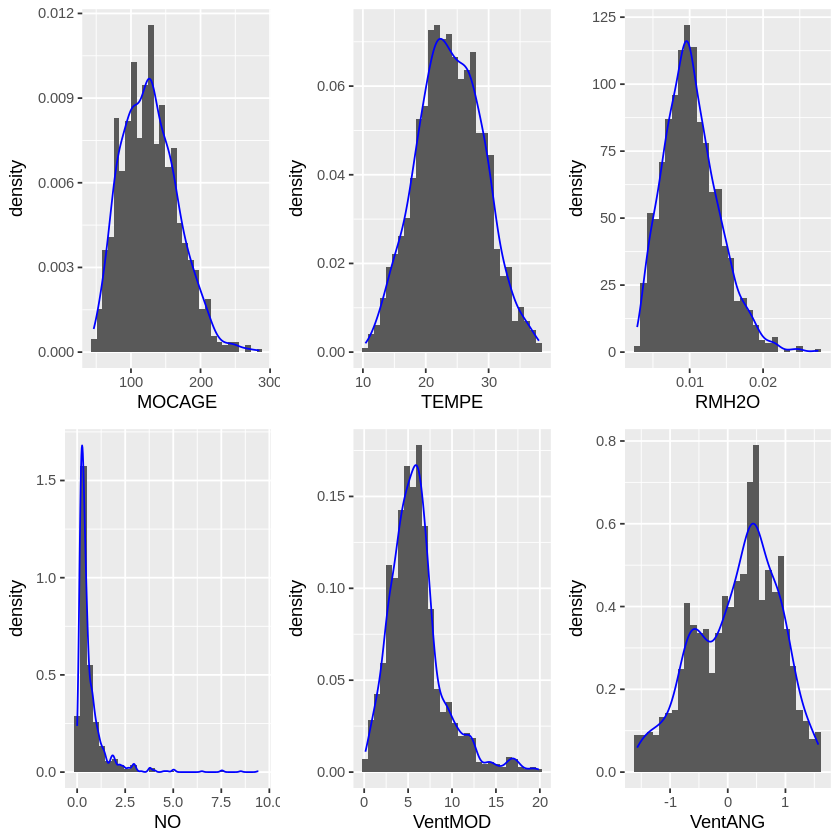

In [34]:
# Même chose pour les autres variables
g3<-ggplot(ozone,aes(x=MOCAGE))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue")
g4<-ggplot(ozone,aes(x=TEMPE))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue")
g5<-ggplot(ozone,aes(x=RMH2O))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue")
g6<-ggplot(ozone,aes(x=NO))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue")
g7<-ggplot(ozone,aes(x=VentMOD))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue")
g8<-ggplot(ozone,aes(x=VentANG))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue")

grid.arrange(g3,g4,g5,g6,g7,g8,ncol=3)
rm(g1,g2,g3,g4,g5,g6,g7,g8)


In [ ]:
#Question Précisez la nature des différentes variables. Il est nécessaire d'en étudier la distribution. Notez la symétrie ou non de celles-ci.

#Réponse :
#JOUR et STATION sont des variables qualitatives :
#JOUR indique le type de jour (férié ou non).
#STATION indique le lieu d’observation.
#Les variables O3obs, MOCAGE, TEMPE, RMH2O, NO2, NO, VentMOD, VentANG sont des variables quantitatives, car elles prennent des valeurs numériques.

#Interprétation  :
#1-TEMPE a une distribution plutôt symétrique, c’est-à-dire que les valeurs sont réparties de manière équilibrée autour
#d’une valeur centrale (forme proche d’une cloche).

#2-O3obs, NO2, NO, RMH2O et VentMOD ont des distributions asymétriques à droite, ce qui signifie que
#la majorité des valeurs sont petites et que quelques valeurs plus grandes apparaissent rarement, formant une queue vers la droite du graphique.

#3-MOCAGE est unimodale, c’est-à-dire que la distribution présente un seul pic principal,
#avec une légère asymétrie. Cela indique que la plupart des valeurs se concentrent autour d’un même niveau.

#4-VentANG est une variable angulaire, ce qui veut dire qu’elle représente une direction (orientation du vent).
#Les valeurs proches de 0° et 360° correspondent en réalité à des directions proches, ce qui fait que sa distribution ne s’interprète pas
#comme celle d’une variable numérique classique.



In [ ]:
#Transformations de variables

In [35]:
ozone[, "SRMH2O"] <- sqrt(ozone[, "RMH2O"])
ozone[, "LNO2"] <- log(ozone[, "NO2"])
ozone[, "LNO"] <- log(ozone[, "NO"])

In [36]:
ozone <- ozone[, c(1:4, 8:13)]

In [37]:
ozone[, "DepSeuil"] <- as.factor(ozone[, "O3obs"] > 150)
summary(ozone)

 JOUR        O3obs           MOCAGE          TEMPE       STATION  
 0:724   Min.   : 19.0   Min.   : 46.4   Min.   :10.40   Aix:199  
 1:317   1st Qu.: 87.0   1st Qu.: 97.5   1st Qu.:20.20   Als:222  
         Median :109.0   Median :125.6   Median :23.80   Cad:202  
         Mean   :115.4   Mean   :127.2   Mean   :23.88   Pla:208  
         3rd Qu.:135.0   3rd Qu.:153.6   3rd Qu.:27.60   Ram:210  
         Max.   :319.0   Max.   :284.7   Max.   :38.00            
    VentMOD           VentANG            SRMH2O             LNO2        
 Min.   : 0.1414   Min.   :-1.5708   Min.   :0.05339   Min.   :-1.3548  
 1st Qu.: 3.9623   1st Qu.:-0.3948   1st Qu.:0.08735   1st Qu.: 0.2215  
 Median : 5.5973   Median : 0.2783   Median :0.09925   Median : 0.7462  
 Mean   : 5.9072   Mean   : 0.1631   Mean   :0.09957   Mean   : 0.8440  
 3rd Qu.: 7.1063   3rd Qu.: 0.6926   3rd Qu.:0.11153   3rd Qu.: 1.4017  
 Max.   :19.8910   Max.   : 1.5708   Max.   :0.16592   Max.   : 3.7931  
      LNO           

In [ ]:
#1) Ce que fait le code
#SRMH2O = sqrt(RMH2O) : racine carrée → rend souvent une variable positive moins asymétrique.
#LNO2 = log(NO2) et LNO = log(NO) : logarithme → réduit les très grandes valeurs, donc diminue l’asymétrie à droite.
#Ensuite :
#ozone <- ozone[, c(1:4, 8:13)] : je supprimes les variables originales (RMH2O, NO2, NO) et je gardes les nouvelles (SRMH2O, LNO2, LNO) + le reste.

`stat_bin()` using `bins = 30`. Pick better value `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value `binwidth`.


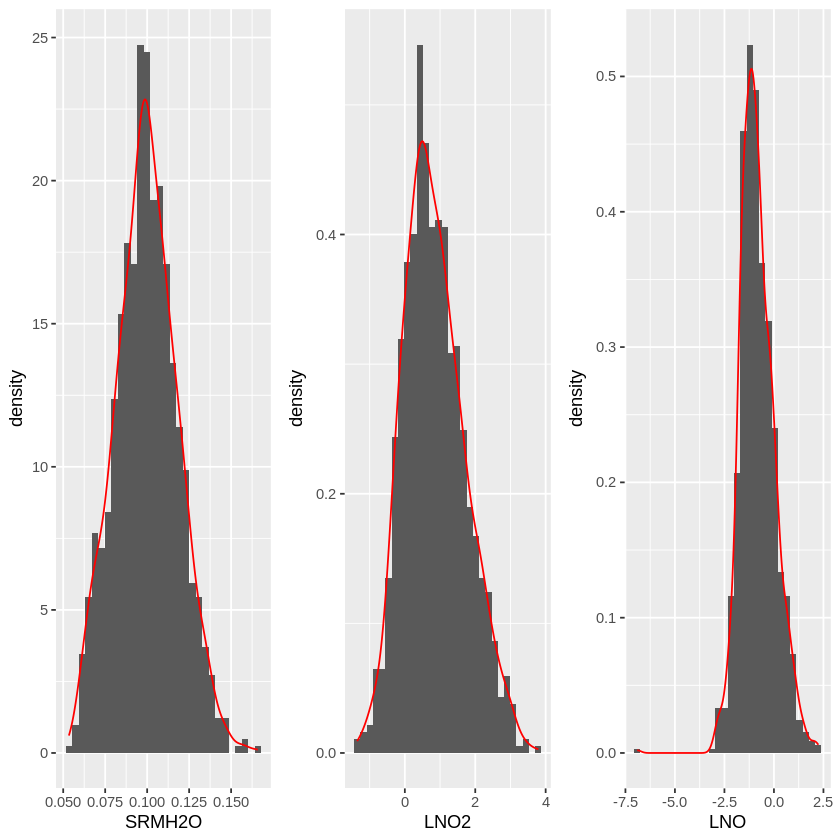

In [38]:
#reverification pour répondre a la question :
g1 <- ggplot(ozone, aes(x = SRMH2O)) +
  geom_histogram(aes(y = after_stat(density))) +
  geom_density(col = "red")

g2 <- ggplot(ozone, aes(x = LNO2)) +
  geom_histogram(aes(y = after_stat(density))) +
  geom_density(col = "red")

g3 <- ggplot(ozone, aes(x = LNO)) +
  geom_histogram(aes(y = after_stat(density))) +
  geom_density(col = "red")

grid.arrange(g1, g2, g3, ncol = 3)

In [ ]:
# Après transformation, les distributions de SRMH2O, LNO2 et LNO sont
# plus symétriques et plus proches d’une forme en cloche.
# La transformation par racine carrée (RMH2O) et par logarithme (NO2, NO)
# réduit l’asymétrie et l’influence des valeurs extrêmes.
# Les transformations sont donc pertinentes, en particulier pour les
# modèles linéaires, et les variables initiales RMH2O, NO2 et NO
# peuvent être retirées au profit des variables transformées.


In [ ]:
#Corrélations des variables

In [41]:
install.packages("GGally")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



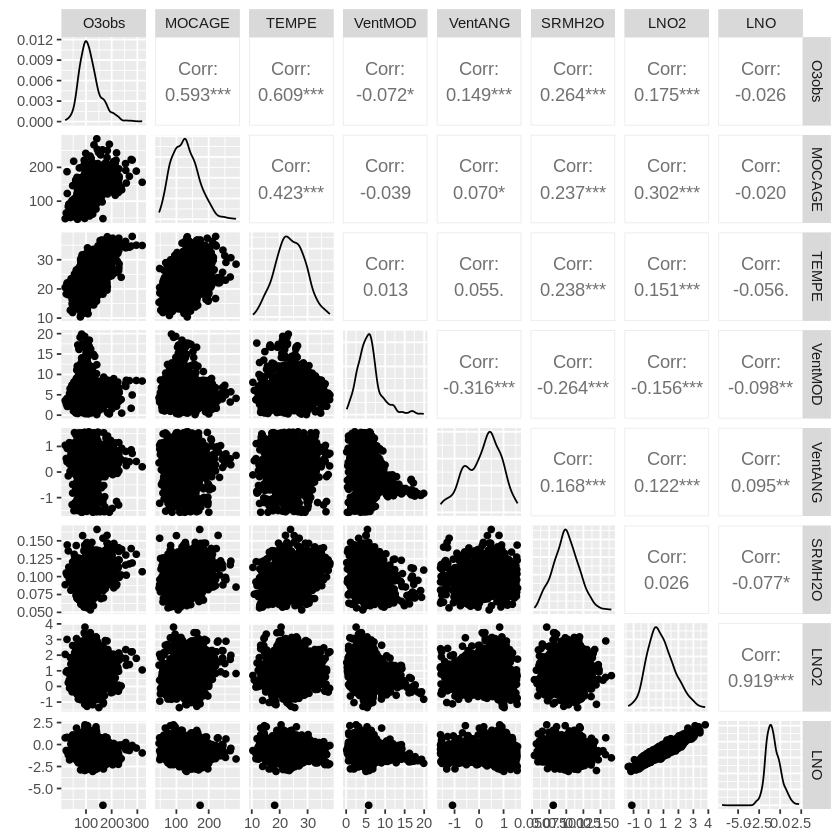

In [42]:
library(GGally)
ggpairs(ozone[, c(2:4, 6:10)])

In [ ]:
#  Explication du code ggpairs()
# library(GGally) charge le package GGally.
# ggpairs(ozone[, c(2:4, 6:10)]) affiche une matrice de graphiques pour les variables choisies :
# - Sur la diagonale : la distribution de chaque variable (histogramme/densité).
# - Sous la diagonale : des nuages de points (relation visuelle entre 2 variables).
# - Au-dessus : la corrélation numérique (valeur "Corr: ...").

# -----------------------------
# Question : Que dire sur les relations des variables 2 à 2 ?
# -----------------------------
# - O3obs est positivement corrélé avec TEMPE (~0.61) :
#   quand la température augmente, le niveau d’ozone augmente en général.
#
# - O3obs est aussi positivement corrélé avec MOCAGE (~0.59) :
#   la prévision MOCAGE est proche de ce qui est réellement observé pour l’ozone.
#
# - O3obs a des corrélations plus faibles avec SRMH2O (~0.26) et LNO2 (~0.18) :
#   ces variables ont un effet plus faible sur l’ozone.
#
# - VentMOD (force du vent) est négativement corrélé avec plusieurs variables :
#   quand le vent est plus fort, les polluants ont tendance à diminuer,
#   car le vent les disperse.
#
# - LNO2 et LNO sont très fortement corrélés (~0.92) :
#   ces deux variables évoluent presque de la même façon
#   et donnent donc presque la même information.




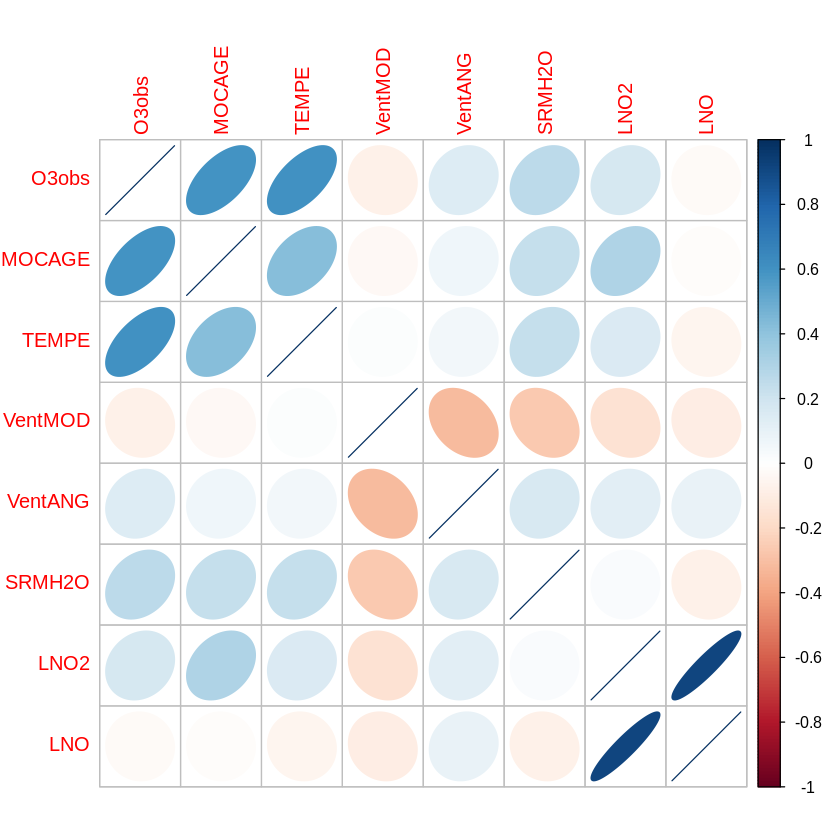

In [43]:

library(corrplot)
corrplot(cor(ozone[, c(2:4, 6:10)]),method="ellipse")

In [ ]:

# (Explication du code corrplot()
# library(corrplot) charge le package corrplot.
# cor(...) calcule la matrice de corrélation entre toutes les variables sélectionnées.
# corrplot(..., method="ellipse") affiche cette matrice sous forme d’ellipses :
# - bleu = corrélation positive ; rouge = corrélation négative ;
# - plus la couleur est foncée (et l’ellipse fine), plus la corrélation est forte.


# ----------------------------
# Question : Limite de corrplot() + quel type de corrélation est mesuré ?
# ----------------------------
# - La fonction cor() calcule la corrélation de Pearson.
# - Cette corrélation mesure surtout les liens en ligne droite entre deux variables.
# - Si la relation n’est pas en ligne droite, Pearson peut ne pas bien la détecter.
# - La corrélation est sensible aux valeurs très grandes ou très petites.
# - Une corrélation ne signifie pas qu’une variable est la cause de l’autre.
# - Pour une variable comme VentANG (direction du vent), la corrélation classique
#   est plus difficile à interpréter.



In [ ]:
#Analyse en composantes principales


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths


Warning message in geom_bar(stat = "identity", fill = barfill, color = barcolor, :
“Ignoring empty aesthetic: `width`.”


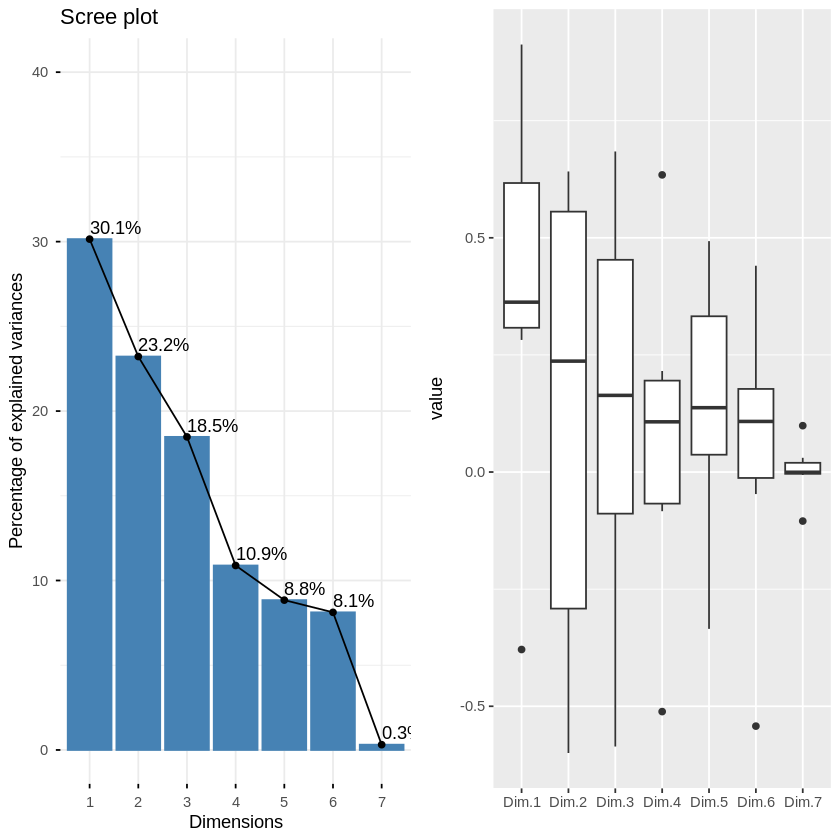

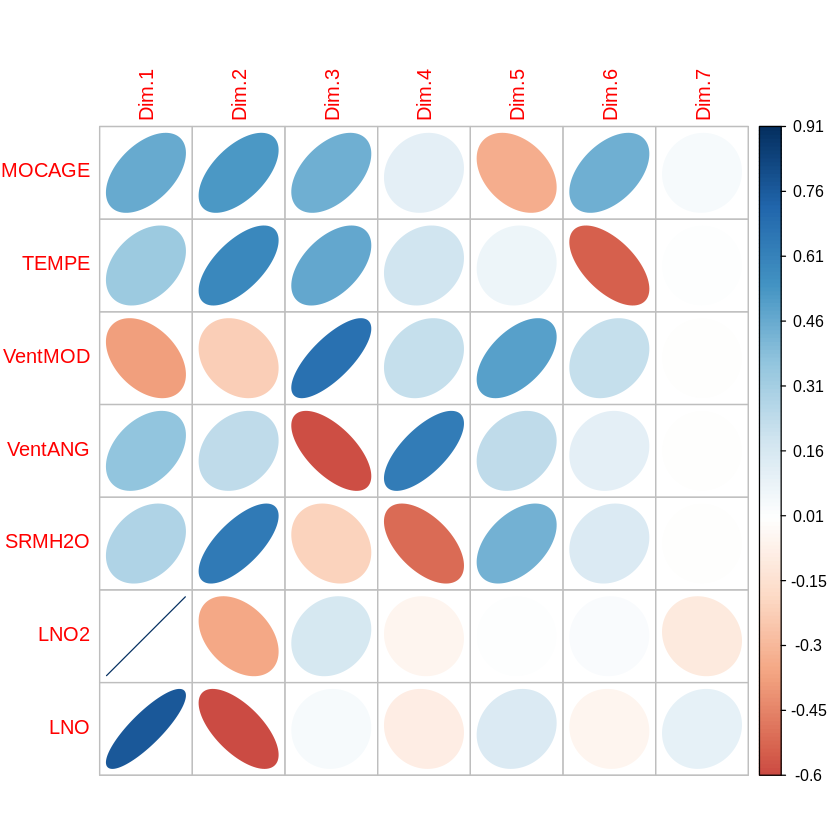

In [46]:
# ACP réduite
library(FactoMineR)
acp <- PCA(
  ozone[, c(11, 2:4, 6:10)],
  scale.unit = TRUE,
  graph = FALSE,
  quali.sup = 1,
  quanti.sup = 2,
  ncp = 7
)

# Décroissance des valeurs propres
library(factoextra)
g1 <- fviz_eig(acp, addlabels = TRUE, ylim = c(0, 40))

# Boxplot des coordonnées des VARIABLES sur les axes (coordonnées ACP)
library(reshape2)
library(ggplot2)
coord_var <- melt(acp$var$coord)

g2 <- ggplot(coord_var, aes(x = Var2, y = value)) +
  geom_boxplot() +
  xlab("")

# Affichage côte à côte
library(gridExtra)
grid.arrange(g1, g2, ncol = 2)

# Corrélations des variables avec les axes
library(corrplot)
corrplot(acp$var$cor, is.corr = FALSE, method = "ellipse")



Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.
ℹ The deprecated feature was likely used in the ggpubr package.
  Please report the issue at <https://github.com/kassambara/ggpubr/issues>.”
Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.
ℹ The deprecated feature was likely used in the factoextra package.
  Please report the issue at <https://github.com/kassambara/factoextra/issues>.”


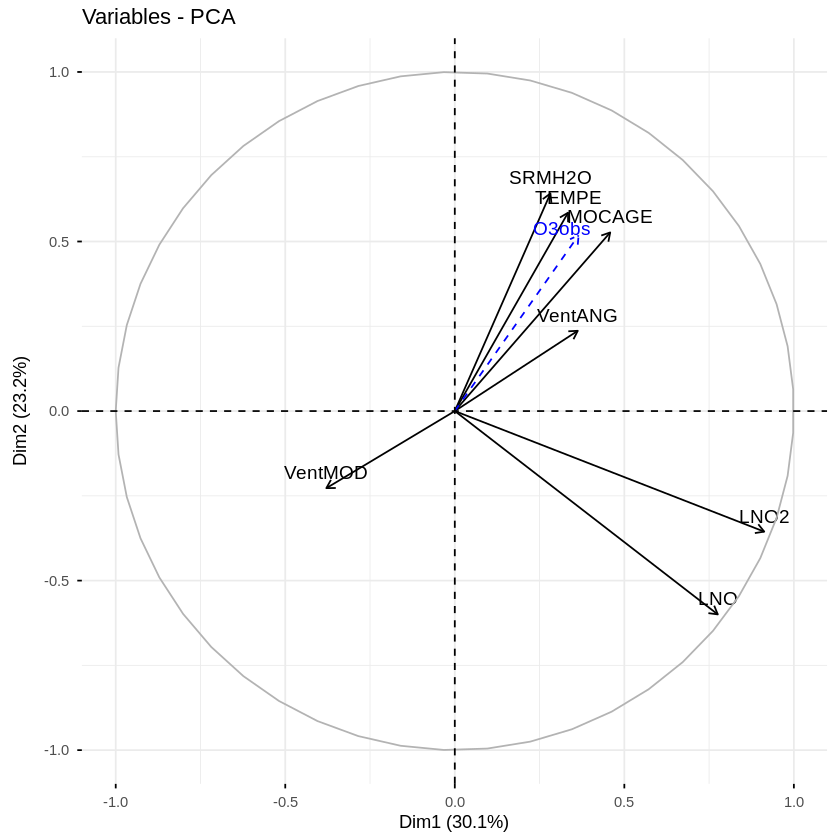

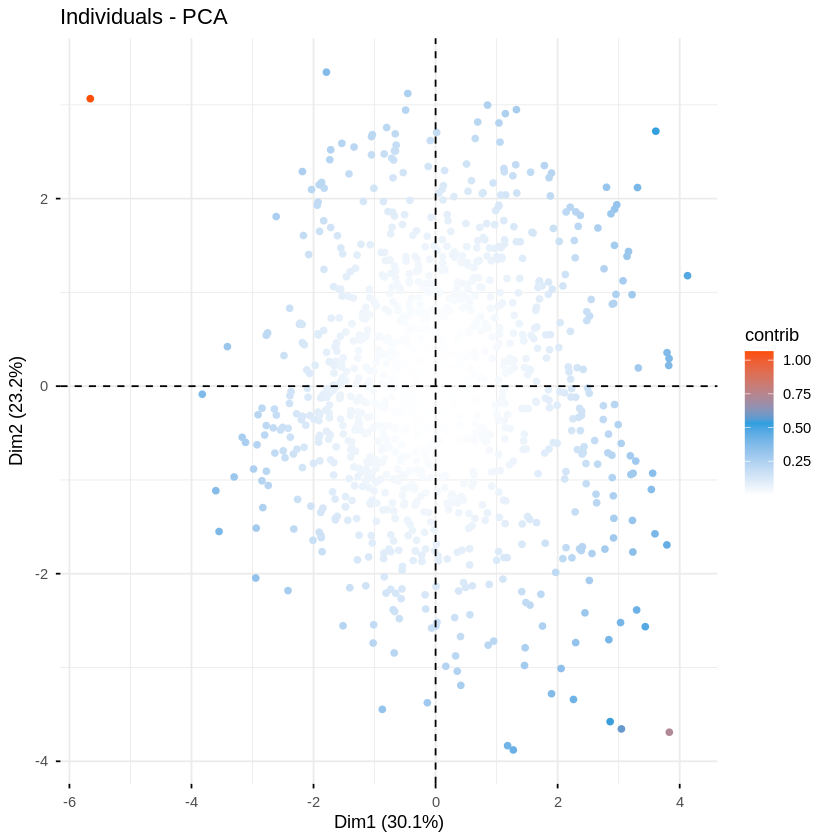

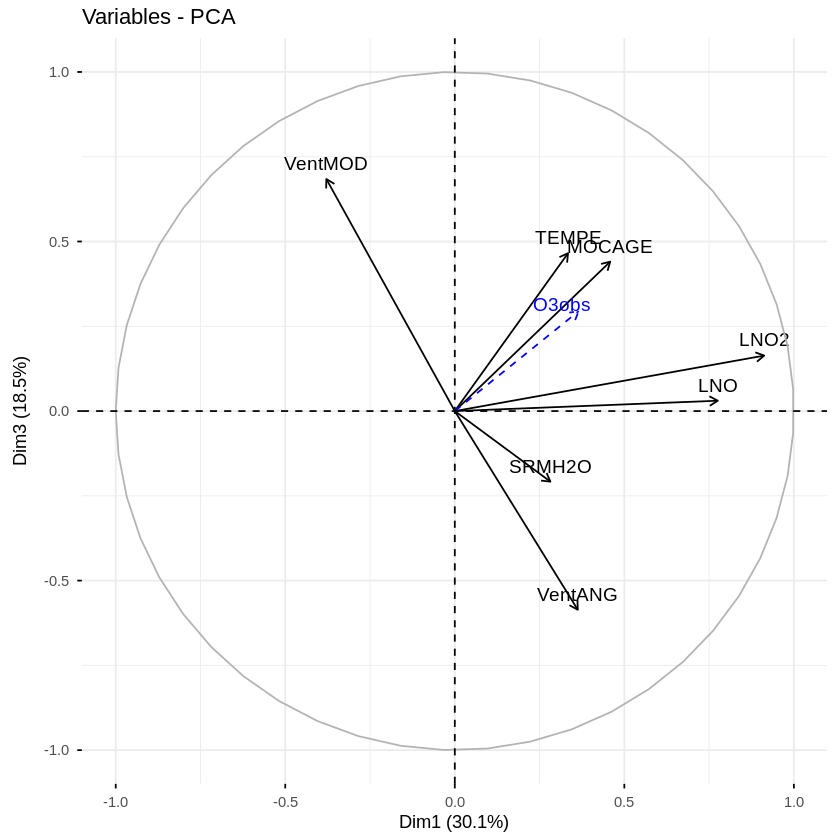

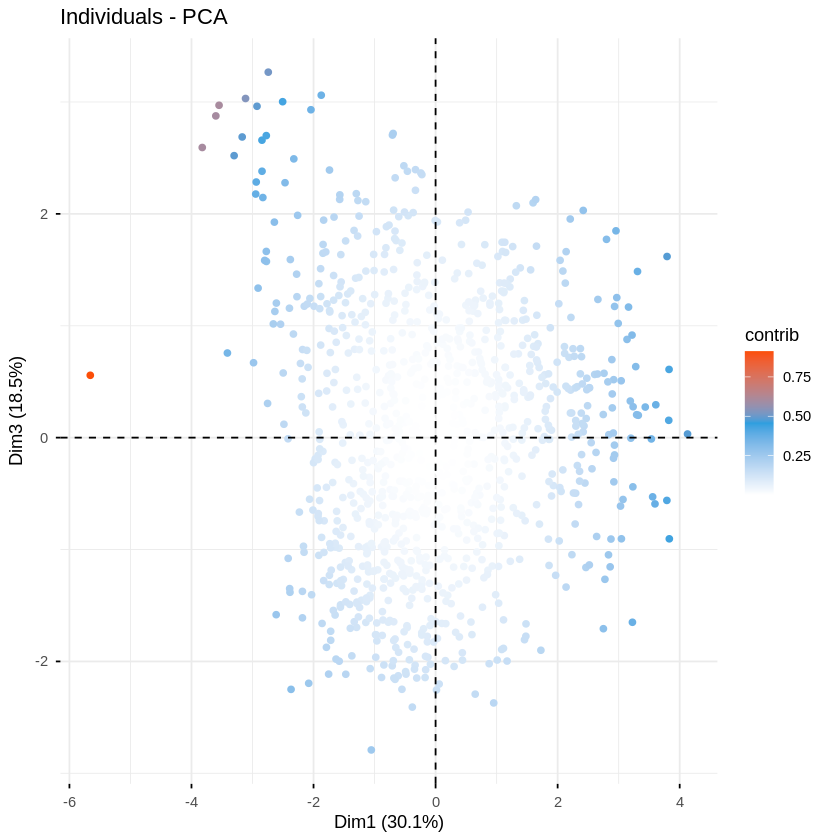

In [47]:

fviz_pca_var(acp)
fviz_pca_ind(acp,col.ind="contrib",label="none",gradient.cols = c("white", "#2E9FDF", "#FC4E07" ))
fviz_pca_var(acp,axes=c(1,3))
fviz_pca_ind(acp,col.ind="contrib",label="none",gradient.cols = c("white", "#2E9FDF", "#FC4E07" ),axes=c(1,3))

In [ ]:
# ------------------------------------------------------------------
# 1) Question : Que représentent ces différents graphiques ?
# ------------------------------------------------------------------
# - Le scree plot montre la part d’information expliquée par chaque axe.
# - Les boxplots montrent la répartition des variables sur les axes.
# - Les cercles de corrélation montrent les relations entre les variables.
# - Les graphiques des individus montrent la répartition des observations
#   et permettent de repérer des points atypiques.

# ------------------------------------------------------------------
# 2) Question : Choix du nombre de dimensions et valeurs atypiques
# ------------------------------------------------------------------
# Les deux premiers axes expliquent environ 53 % de l’information totale.
# Avec trois axes, on dépasse environ 70 %, ce qui est suffisant
# pour résumer les données.
# Il est donc raisonnable de conserver 2 ou 3 dimensions.
# Sur les graphiques des individus, quelques points sont éloignés du centre :
# ce sont des valeurs atypiques, mais elles sont peu nombreuses.

# ------------------------------------------------------------------
# 3) Question : Structure de corrélation des variables (est-elle intuitive ?)
# ------------------------------------------------------------------
# TEMPE, MOCAGE, SRMH2O et O3obs vont globalement dans la même direction :
# elles sont positivement corrélées et liées à la pollution à l’ozone.
# LNO et LNO2 sont très proches l’une de l’autre :
# elles portent presque la même information.
# VentMOD est souvent en opposition avec les variables de pollution :
# quand le vent est fort, la pollution diminue (effet de dispersion).
# Cette structure est logique et cohérente avec la réalité météorologique.

# ------------------------------------------------------------------
# 4) Interprétation globale
# ------------------------------------------------------------------
# L’ACP permet de résumer les variables météorologiques en quelques axes.
# Les premiers axes représentent surtout la pollution et la température,
# ainsi que l’effet du vent.
# Les relations observées sont cohérentes et faciles à interpréter,
# ce qui montre que l’ACP est pertinente pour explorer ces données.

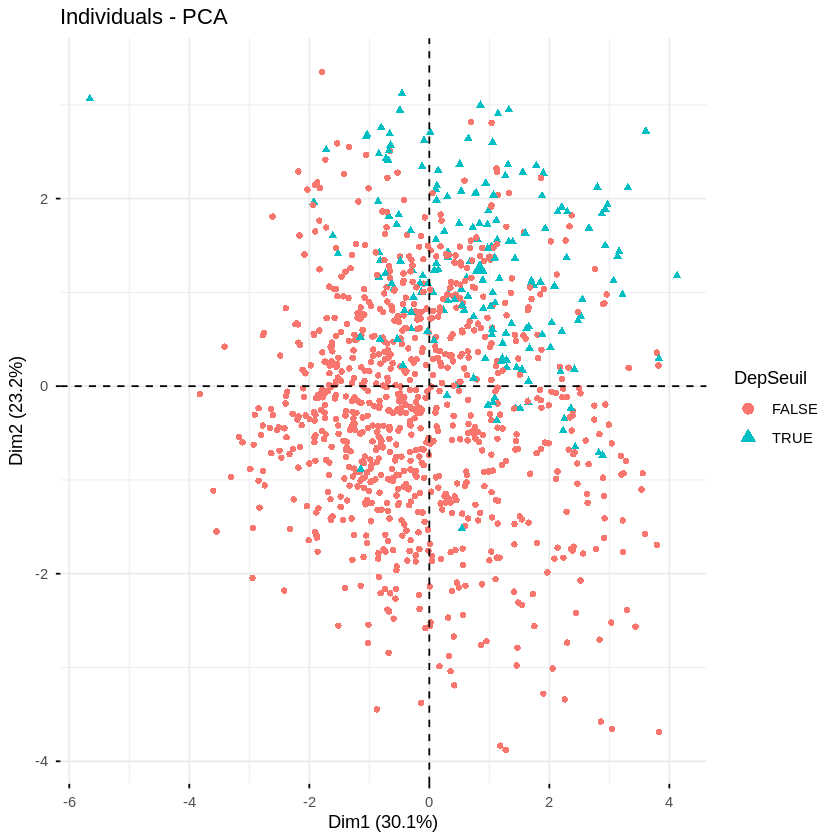

In [48]:
fviz_pca_ind(acp, label="none", habillage=1)

In [ ]:
# Observation sur le graphique :
# - Les deux classes (FALSE et TRUE) ne sont pas parfaitement séparées.
# - On voit une tendance : beaucoup de points TRUE sont plutôt en haut à droite,
#   mais il y a aussi beaucoup de mélange avec les points FALSE.
# - Donc les deux groupes se recouvrent (overlap) dans le plan Dim1/Dim2.

# Réponse à la question : Une discrimination linéaire (hyperplan) semble-t-elle possible ?
# - Une séparation linéaire parfaite semble difficile, car les deux classes se mélangent.
# - Par contre, une séparation linéaire approximative est possible :
#   on peut tracer une droite qui sépare “plutôt” la zone où il y a plus de TRUE,
#   mais il restera des erreurs (des points mal classés).
# - Conclusion : discrimination linéaire possible mais pas parfaite (chevauchement important).

In [ ]:
#Clustering

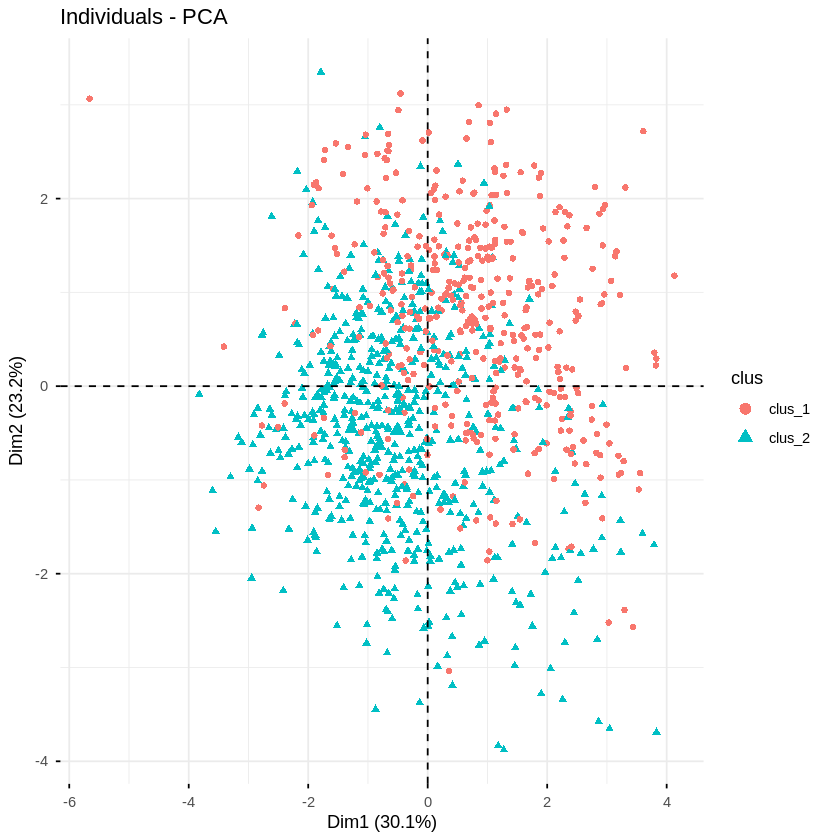

In [49]:
km.ozone <- kmeans(ozone[, c(3:4, 6:10)], centers = 2)
# Représentation dans les coordonnées de l'acp
acp2 <- PCA(cbind(clus = as.factor(km.ozone$cluster),
          ozone[, c(11, 3:4, 6:10)]), scale.unit = TRUE,
          graph = FALSE, quali.sup = 1:2, ncp = 7)
fviz_pca_ind(acp2, label="none", habillage="clus")

In [ ]:
#Protocole de comparaison

In [ ]:
# ------------------------------------------------------------------
# Question : La classification non supervisée donne-t-elle la même information ?
# ------------------------------------------------------------------

# Observation du graphique :
# - Les deux clusters (clus_1 et clus_2) sont globalement séparés,
#   mais ils ne correspondent pas exactement aux classes DepSeuil (TRUE / FALSE).
# - On observe encore un mélange important des points.
# - Certains points classés ensemble par K-means ne correspondent pas
#   au dépassement réel du seuil d’ozone.

# Interprétation :
# - Le clustering K-means regroupe les observations selon leur similarité globale,
#   sans utiliser l’information sur le dépassement du seuil.
# - Il ne cherche pas à prédire DepSeuil, mais seulement à créer des groupes.
# - Les clusters captent une structure générale des données,
#   mais pas spécifiquement le dépassement de seuil d’ozone.

# Conclusion :
# - La classification non supervisée ne donne pas exactement la même information
#   que la variable DepSeuil.
# - Elle est donc moins adaptée ici pour l’objectif de prédiction du dépassement,
#   mais elle permet de mieux comprendre la structure globale des données.

In [ ]:
#Protocole de comparaison

In [50]:
set.seed(111) # initialisation du générateur
# Extraction des échantillons
test.ratio <- .2   # part de l'échantillon test
npop <- nrow(ozone) # nombre de lignes dans les données
nvar <- ncol(ozone) # nombre de colonnes
# taille de l'échantillon test
ntest <- ceiling(npop * test.ratio)
# indices de l'échantillon test
testi <- sample(1:npop, ntest)
# indices de l'échantillon d'apprentissage
appri <- setdiff(1:npop, testi)

In [51]:
# Construction des échantillons pour la REGRESSION (prédire O3obs)
# construction de l'échantillon d'apprentissage
datappr <- ozone[appri, -11]
# construction de l'échantillon test
datestr <- ozone[testi, -11]
# vérification
str(datappr)
str(datestr)
#summary(datappr)

'data.frame':	832 obs. of  10 variables:
 $ JOUR   : Factor w/ 2 levels "0","1": 2 2 1 1 1 1 1 2 2 1 ...
 $ O3obs  : int  91 100 82 94 107 150 164 135 121 129 ...
 $ MOCAGE : num  93.2 104.6 103.6 94.8 99 ...
 $ TEMPE  : num  21.5 20.2 17.4 18.8 23.7 23.6 26.6 23.5 23.3 23.7 ...
 $ STATION: Factor w/ 5 levels "Aix","Als","Cad",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ VentMOD: num  9.5 8.01 9.38 9.46 7.88 ...
 $ VentANG: num  -0.643 -0.05 -0.128 -0.345 -0.418 ...
 $ SRMH2O : num  0.092 0.0939 0.0975 0.0925 0.0855 ...
 $ LNO2   : num  0.471 0.752 0.505 0.854 0.503 ...
 $ LNO    : num  -0.858 -0.633 -0.761 -0.355 -0.794 ...
'data.frame':	209 obs. of  10 variables:
 $ JOUR   : Factor w/ 2 levels "0","1": 1 1 1 2 1 1 1 2 2 2 ...
 $ O3obs  : int  135 143 71 77 79 155 101 75 114 156 ...
 $ MOCAGE : num  127.8 189.7 103.9 73 87.8 ...
 $ TEMPE  : num  18.8 21 25.9 23.5 12.3 32.2 19.4 27.6 24.9 27 ...
 $ STATION: Factor w/ 5 levels "Aix","Als","Cad",..: 3 4 1 5 5 1 2 3 4 2 ...
 $ VentMOD: num  2.1 3.14 10

In [55]:

# Construction des échantillons pour la CLASSIFICATION (prédire DepSeuil)
# construction de l'échantillon d'apprentissage
datappq <- ozone[appri,-2]
# construction de l'échantillon test
datestq <- ozone[testi,-2]

# vérification
str(datappq)
str(datestq)
#summary(datappq)

'data.frame':	832 obs. of  10 variables:
 $ JOUR    : Factor w/ 2 levels "0","1": 2 2 1 1 1 1 1 2 2 1 ...
 $ MOCAGE  : num  93.2 104.6 103.6 94.8 99 ...
 $ TEMPE   : num  21.5 20.2 17.4 18.8 23.7 23.6 26.6 23.5 23.3 23.7 ...
 $ STATION : Factor w/ 5 levels "Aix","Als","Cad",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ VentMOD : num  9.5 8.01 9.38 9.46 7.88 ...
 $ VentANG : num  -0.643 -0.05 -0.128 -0.345 -0.418 ...
 $ SRMH2O  : num  0.092 0.0939 0.0975 0.0925 0.0855 ...
 $ LNO2    : num  0.471 0.752 0.505 0.854 0.503 ...
 $ LNO     : num  -0.858 -0.633 -0.761 -0.355 -0.794 ...
 $ DepSeuil: Factor w/ 2 levels "FALSE","TRUE": 1 1 1 1 1 1 2 1 1 1 ...
'data.frame':	209 obs. of  10 variables:
 $ JOUR    : Factor w/ 2 levels "0","1": 1 1 1 2 1 1 1 2 2 2 ...
 $ MOCAGE  : num  127.8 189.7 103.9 73 87.8 ...
 $ TEMPE   : num  18.8 21 25.9 23.5 12.3 32.2 19.4 27.6 24.9 27 ...
 $ STATION : Factor w/ 5 levels "Aix","Als","Cad",..: 3 4 1 5 5 1 2 3 4 2 ...
 $ VentMOD : num  2.1 3.14 10.68 4.3 4.6 ...
 $ VentANG : 

In [54]:
gplot.res <- function(x, y, titre = "titre"){
    ggplot(data.frame(x=x, y=y),aes(x,y))+
    geom_point(col = "blue")+xlim(0, 250)+ylim(-150, 150)+
    ylab("Résidus")+ xlab("Valeurs prédites")+
    ggtitle(titre)+
    geom_hline(yintercept = 0,col="green")
}

In [ ]:
# gplot.res <- function(x, y, titre="titre"){ ... }
# - Ici je ne traces pas un graphe.
# - je crées juste une fonction "gplot.res" qui servira plus tard.
# - Pour voir un graphe, il faut APPELER la fonction avec des données.


In [ ]:
#Partie2_Prévision par modèle Gaussien

In [ ]:
#Modèle linéaire

Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”


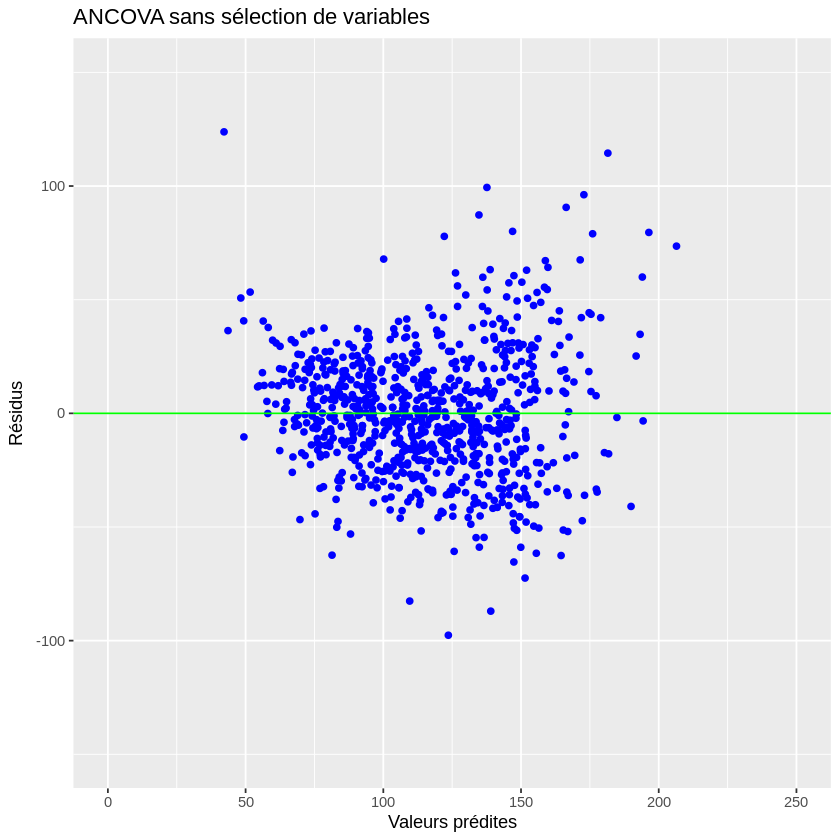

In [57]:

# estimation du modèle sans interaction
reg.lm <- aov(O3obs ~ ., data = datappr)
# valeurs ajustées et résidus
fit.lm <- fitted(reg.lm)      # valeurs prédites
res.lm <- residuals(reg.lm)   # résidus
# Graphe des résidus
gplot.res(fit.lm, res.lm, "ANCOVA sans sélection de variables")


In [ ]:

# ===========================
# Réponse à la question 1 :
# "Que dire de la distribution de ces résidus ?"
# ===========================
# Sur le graphe, les résidus sont globalement centrés autour de 0 (ligne verte),
# donc le modèle n'a pas un gros biais global (il ne surestime pas tout le temps ou
# ne sous-estime pas tout le temps).
# Mais on observe :
# - une dispersion qui semble augmenter quand les valeurs prédites deviennent grandes
#   (vers 150-200), donc les résidus sont plus "étalés" dans cette zone.
# - quelques points extrêmes (résidus très positifs ou très négatifs) : ce sont des valeurs atypiques
#   (outliers) que le modèle explique mal.
# Conclusion simple :
# => Les résidus sont plutôt centrés sur 0 mais pas parfaitement "stables" :
#    il y a une hétéroscédasticité probable + quelques outliers.

# ===========================
# Réponse à la question 2 :
# "La forme du nuage renseigne sur linéarité et homoscédasticité.
#  Que dire de la validité de ce modèle ?"
# ===========================
# (A) Linéarité :
# Si le modèle est bien linéaire, on veut un nuage de points sans forme,
# juste une "bande horizontale" autour de 0.
# Ici, on ne voit pas une courbe très nette (pas de forme en U très claire),
# donc la linéarité n'est pas totalement contredite.
# MAIS il semble que le modèle ne capture pas parfaitement tout (dispersion forte, points extrêmes).

# (B) Homoscédasticité :
# On veut une dispersion des résidus similaire pour petites et grandes valeurs prédites.
# Ici, la dispersion augmente quand ŷ augmente => variance non constante.
# Donc l'hypothèse d'homoscédasticité est probablement NON respectée.

# Conclusion simple sur la validité :
# => Ce modèle linéaire "fonctionne" comme première approximation,
#    mais il n'est pas totalement valide car la variance des erreurs n'est pas constante
#    (hétéroscédasticité) et il existe des valeurs atypiques.
#    Il faudra améliorer le modèle (sélection de variables, interactions, transformation,
#    ou modèle quadratique) avant de l'utiliser pour une prévision fiable sur l'échantillon test.


In [58]:
summary(reg.lm)
coef(reg.lm)

             Df Sum Sq Mean Sq F value   Pr(>F)    
JOUR          1    106     106   0.134 0.714791    
MOCAGE        1 470173  470173 590.680  < 2e-16 ***
TEMPE         1 225427  225427 283.204  < 2e-16 ***
STATION       4  10163    2541   3.192 0.012926 *  
VentMOD       1  13846   13846  17.395 3.36e-05 ***
VentANG       1  10088   10088  12.673 0.000392 ***
SRMH2O        1    273     273   0.343 0.558101    
LNO2          1   3337    3337   4.193 0.040918 *  
LNO           1   9006    9006  11.314 0.000805 ***
Residuals   819 651913     796                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Intercept)       JOUR1      MOCAGE       TEMPE  STATIONAls  STATIONCad 
-16.0273451   1.2144463   0.3849814   4.3270454   2.1425958   8.8115799 
 STATIONPla  STATIONRam     VentMOD     VentANG      SRMH2O        LNO2 
 21.0287164   3.4628151  -1.3756918   4.5070677  52.5682991 -14.2991137 
        LNO 
 16.9322029

Warning message:
“Removed 6 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”


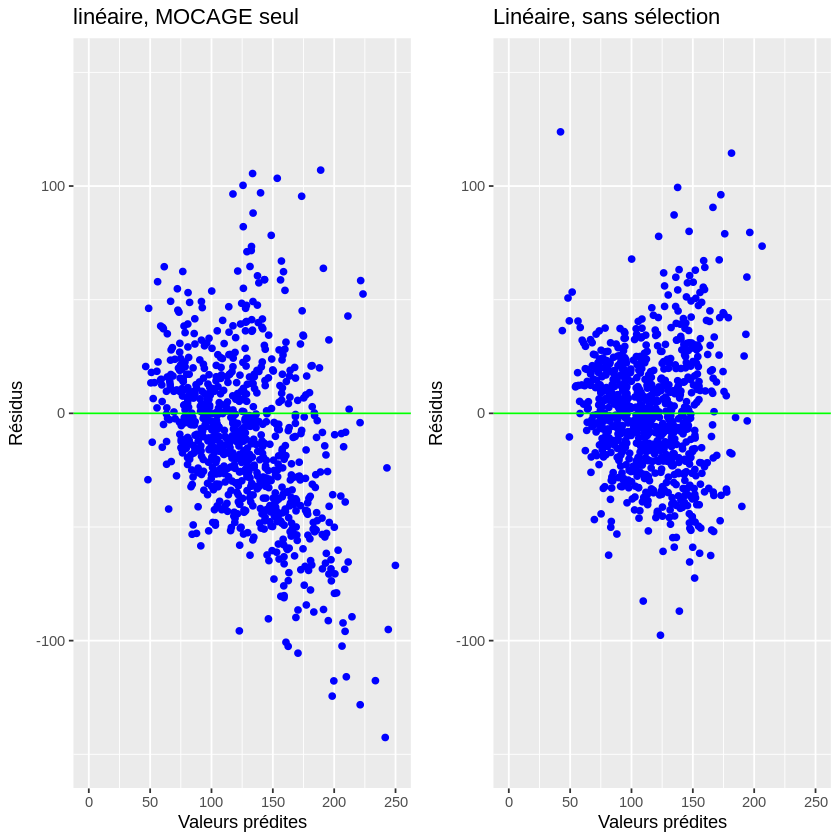

In [59]:
# Graphe des résidus du modèle déterministe MOCAGE
g1<-gplot.res(datappr[, "MOCAGE"],datappr[, "O3obs"]-datappr[, "MOCAGE"], "linéaire, MOCAGE seul")

g2<-gplot.res(fit.lm, res.lm, "Linéaire, sans sélection")
grid.arrange(g1,g2,ncol=2)

In [ ]:
# --- Ce qu'on observe sur les deux graphes :
# 1) Graphe "MOCAGE seul" :
# - Le nuage n'est pas totalement "au hasard".
# - On voit une dispersion importante et une structure (tendance/forme) :
#   ça veut dire que MOCAGE, seul, ne suffit pas :
#   il reste des erreurs systématiques (biais) qui dépendent du niveau prédit.
# - On observe aussi une hétéroscédasticité (dispersion pas constante).
#
# 2) Graphe "Linéaire, sans sélection" :
# - Les résidus sont mieux recentrés autour de 0
# - Le nuage est plus "symétrique" et moins structuré
# => donc le modèle statistique corrige une partie des erreurs de MOCAGE
#    en utilisant d'autres infos (température, vent, station, NO, etc.).
# - Mais la dispersion n'est pas parfaite : il reste de l'hétéroscédasticité
#   et quelques points atypiques.


# Réponse à la question :
# "Ce premier modèle est comparé avec celui de la seule prévision déterministe MOCAGE.
#  Qu'en conclure ?"
# ===========================
#
# => MOCAGE est déjà une variable très importante (très significative),
#    mais MOCAGE seul ne suffit pas pour bien prédire O3obs.
# => Ajouter d'autres variables (TEMPE, vent, station, NO, etc.) améliore le modèle :
#    les résidus deviennent plus aléatoires et plus centrés autour de 0.
# => Donc, le modèle linéaire complet est meilleur que la prévision déterministe seule,
#    même s'il reste des limites (variance non constante + outliers).
#
# En pratique :
# - MOCAGE = base de prédiction
# - le modèle statistique = "correction" / "calibration" de MOCAGE grâce aux autres variables.

In [ ]:
#Sélection de variable par régularisation L1 (LASSO)

Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Loaded glmnet 4.1-10



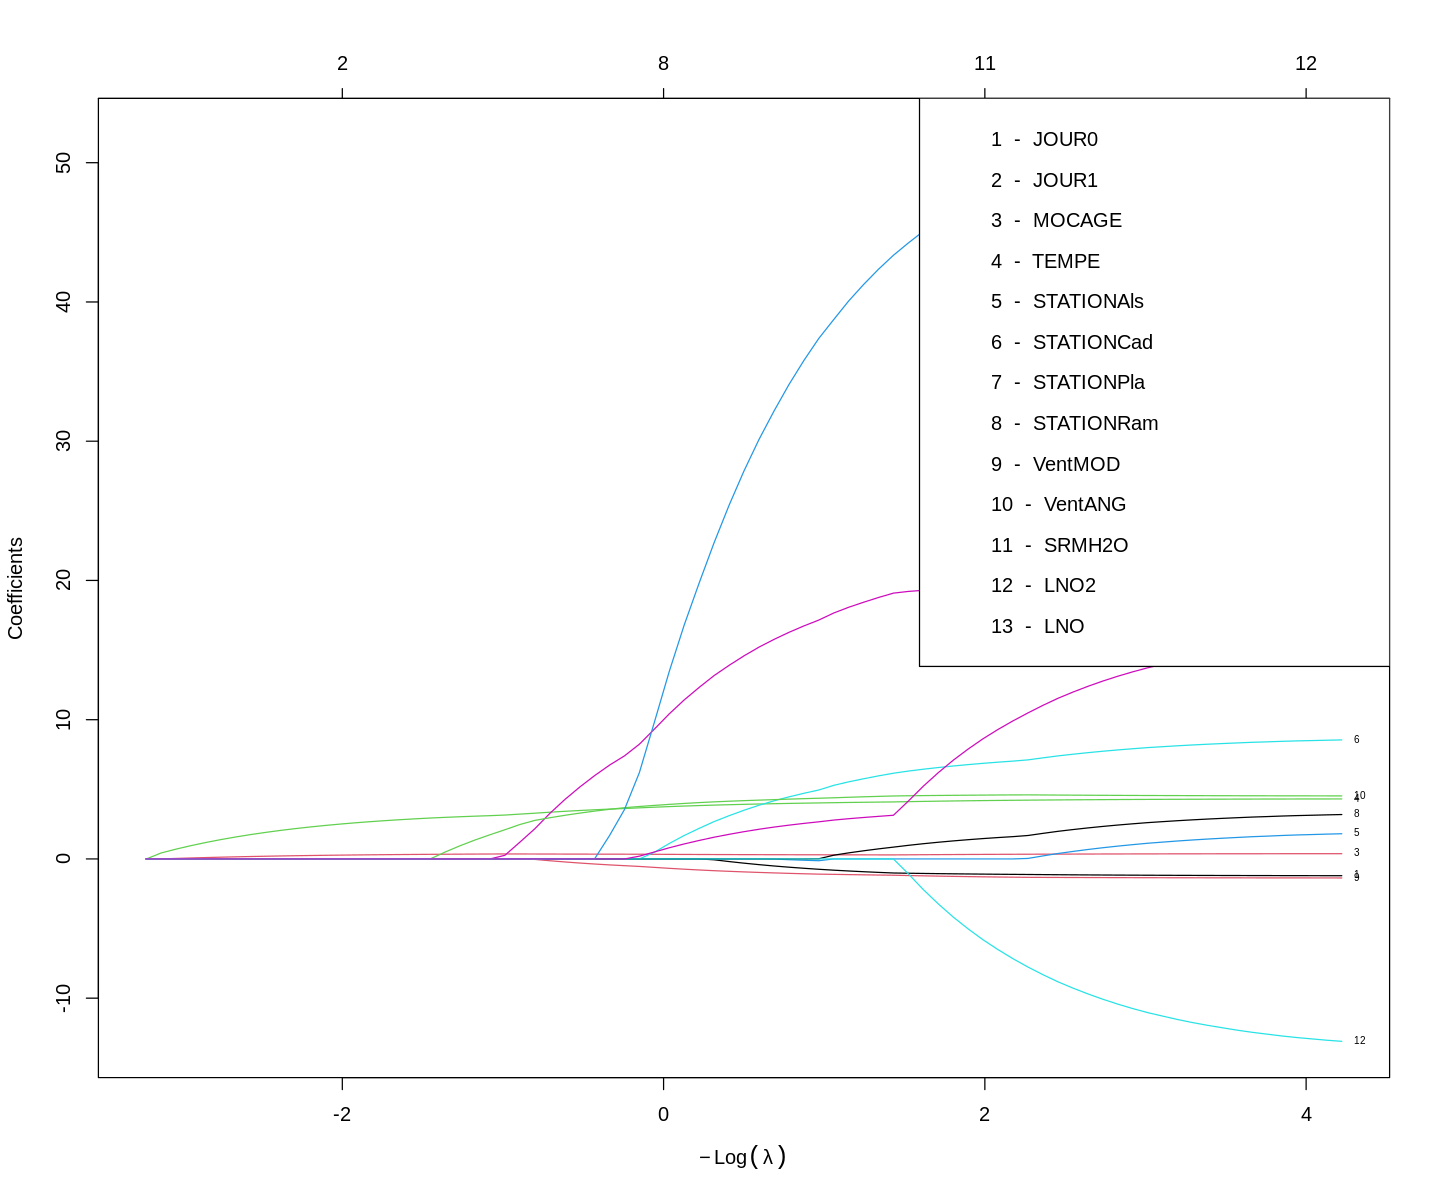

In [60]:
library(glmnet)
# avec des variables quantitatives seulement
reg.lasso.quanti <- glmnet(y = datappr[, 2],
                           x = as.matrix(datappr[, -c(1, 2, 5)]))
# avec toutes les variables, créer d'abord la matrice d'expériences
# avec 'model.matrix' (penser à retirer l'intercept du modèle)
x.mat <- model.matrix(O3obs ~ . - 1, data = datappr)
reg.lasso <- glmnet(y = datappr$O3obs, x = x.mat)
options(repr.plot.width = 12, repr.plot.height = 10)
plot(reg.lasso, xvar = "lambda", label = TRUE)
legend("topright",
       legend = paste(1:ncol(x.mat), " - ", colnames(x.mat)))

In [61]:

#help(model.matrix)
head(x.mat)

,JOUR0,JOUR1,MOCAGE,TEMPE,STATIONAls,STATIONCad,STATIONPla,STATIONRam,VentMOD,VentANG,SRMH2O,LNO2,LNO
1,0,1,93.2,21.5,0,0,0,0,9.5000,-0.64350,0.09203260,0.4712528,-0.8580218
2,0,1,104.6,20.2,0,0,0,0,8.0100,-0.04996,0.09386160,0.7518877,-0.6329933
3,1,0,103.6,17.4,0,0,0,0,9.3771,-0.12832,0.09751923,0.5050087,-0.7614260
4,1,0,94.8,18.8,0,0,0,0,9.4578,-0.34516,0.09246621,0.8544153,-0.3552474
5,1,0,99.0,23.7,0,0,0,0,7.8791,-0.41822,0.08549854,0.5025918,-0.7940731
6,1,0,114.3,23.6,0,0,0,0,6.3127,0.06341,0.10871982,1.6707211,0.2949059


In [ ]:
# ------------------------------------------------------------
# Question :
# "Que fait la commande model.matrix ? Comment sont gérées les variables catégorielles ?"
# ------------------------------------------------------------

# model.matrix transforme toutes les variables du modèle en variables numériques.
#
# - Les variables quantitatives restent inchangées.
# - Les variables catégorielles (facteurs) sont transformées en variables indicatrices
#   (aussi appelées "variables dummy").
#
# Exemple :
# Si STATION a 4 modalités (Als, Cad, Pla, Ram),
# model.matrix crée plusieurs colonnes :
# - STATIONAls
# - STATIONCad
# - STATIONPla
# - STATIONRam
#
# Chaque colonne vaut :
# - 1 si l'observation appartient à cette catégorie
# - 0 sinon
#
# Cela permet au LASSO de :
# - sélectionner ou non chaque catégorie indépendamment,
# - éventuellement supprimer complètement une variable catégorielle
#   si toutes ses modalités ont des coefficients nuls.


# ------------------------------------------------------------
# Question :
# "Que représentent les courbes appelées chemins de régularisation ?"
# ------------------------------------------------------------
# Chaque courbe représente l'évolution du coefficient d'une variable
# en fonction de la pénalisation lambda.
#
# Axe horizontal : -log(lambda)
# - à gauche : lambda grand → forte pénalisation
# - à droite : lambda petit → faible pénalisation
#
# Axe vertical : valeur du coefficient de la variable

# Interprétation des chemins :
# - Quand lambda est grand :
#   → presque tous les coefficients sont égaux à 0
#   → modèle très simple
#
# - Quand lambda diminue :
#   → certaines variables "entrent" dans le modèle
#   → leurs coefficients deviennent non nuls
#
# - Les variables dont les courbes deviennent non nulles très tôt
#   sont les plus importantes pour expliquer O3obs.
#
# - Les variables dont la courbe reste proche de 0
#   ont peu d'influence et peuvent être ignorées.

# ------------------------------------------------------------
# Conclusion générale
# ------------------------------------------------------------

# Le LASSO permet :
# - d'améliorer la prédiction,
# - de sélectionner automatiquement les variables utiles,
# - d'éviter les modèles trop complexes.
#
# Par rapport au modèle linéaire sans sélection :
# - le LASSO fournit un modèle plus parcimonieux,
# - il identifie clairement les variables dominantes (ex : MOCAGE, TEMPE, LNO, etc.),
# - il prépare un meilleur modèle pour la prévision sur l'échantillon test.

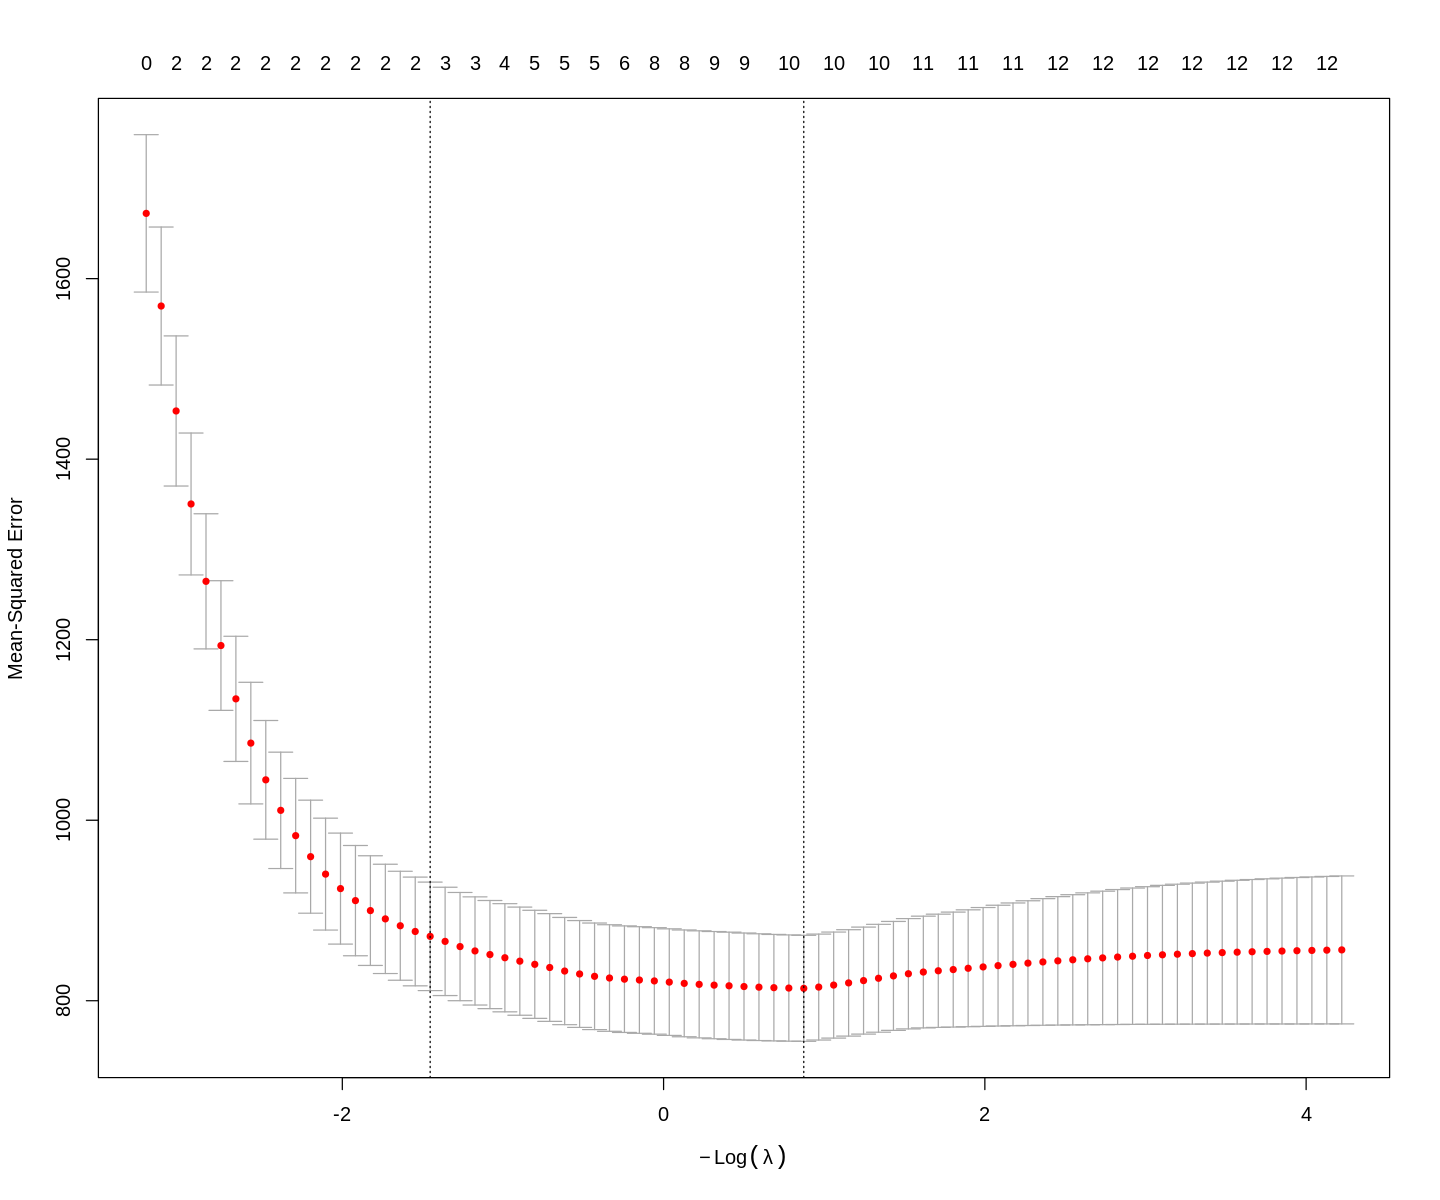

In [63]:

library(glmnet)
reg.lasso.cv <- cv.glmnet(y = datappr[, 2], x = x.mat)
plot(reg.lasso.cv)

In [64]:
# ------------------------------------------------------------
# Question 1 :
# "Que représentent les points gras ? Et la bande autour ?"
# ------------------------------------------------------------
# Les points rouges (points gras) :
# → chaque point représente la MSE moyenne obtenue par validation croisée
#    pour une valeur donnée de lambda.
#
# Autrement dit :
# - on teste un lambda
# - on calcule l’erreur moyenne de prédiction
# - le point rouge est cette erreur moyenne

# La bande grise autour des points :
# → elle représente l’incertitude autour de l’erreur moyenne
# → plus précisément : ± un écart-type de la MSE calculée
#   sur les différents folds de la validation croisée.
#
# Interprétation simple :
# - bande étroite → erreur stable (résultat fiable)
# - bande large   → erreur plus variable (moins stable)

# ------------------------------------------------------------
# Question 2 :
# "Comment sont obtenues les valeurs de log(lambda)
#  correspondant aux lignes verticales en pointillé ?"
# ------------------------------------------------------------
# Les deux lignes verticales correspondent à deux valeurs particulières de lambda :
# 1) lambda.min :
# → valeur de lambda qui minimise l’erreur de validation croisée (MSE minimale).
# → c’est le modèle le plus performant en prédiction pure.
#
# 2) lambda.1se :
# → valeur de lambda la plus grande telle que l’erreur reste
#    inférieure ou égale à :
#    (erreur minimale + 1 écart-type).
#
# En pratique :
# - lambda.min → meilleur en précision
# - lambda.1se → modèle plus simple, plus stable, souvent préféré
#                pour éviter le sur-apprentissage (overfitting).

# Les valeurs de log(lambda) sont obtenues automatiquement par cv.glmnet :
# - glmnet teste une grille de valeurs de lambda
# - calcule la MSE pour chacune
# - identifie :
#   * celle qui minimise la MSE (lambda.min)
#   * celle dans la zone "1 écart-type" (lambda.1se)

# ------------------------------------------------------------
# Conclusion
# ------------------------------------------------------------
# La validation croisée permet de choisir lambda de manière objective.
# Elle fait un compromis entre :
# - qualité de prédiction
# - simplicité du modèle
#
# En général :
# - lambda.min → meilleur ajustement mais plus complexe
# - lambda.1se → modèle plus parcimonieux et plus robuste
#
# Ce choix de lambda est essentiel avant d’utiliser le modèle
# pour la prévision sur l’échantillon test.

In [65]:

# valeur estimée
paste("CV estimate of lambda :", round(reg.lasso.cv$lambda.1se, 3))
# modèle correspondant
coef(reg.lasso.cv, s = "lambda.1se")

[1] "CV estimate of lambda : 4.276"

14 x 1 sparse Matrix of class "dgCMatrix"
            lambda.1se
(Intercept)  3.2420588
JOUR0        .        
JOUR1        .        
MOCAGE       0.3305653
TEMPE        2.9367481
STATIONAls   .        
STATIONCad   .        
STATIONPla   .        
STATIONRam   .        
VentMOD      .        
VentANG      .        
SRMH2O       .        
LNO2         .        
LNO          .        

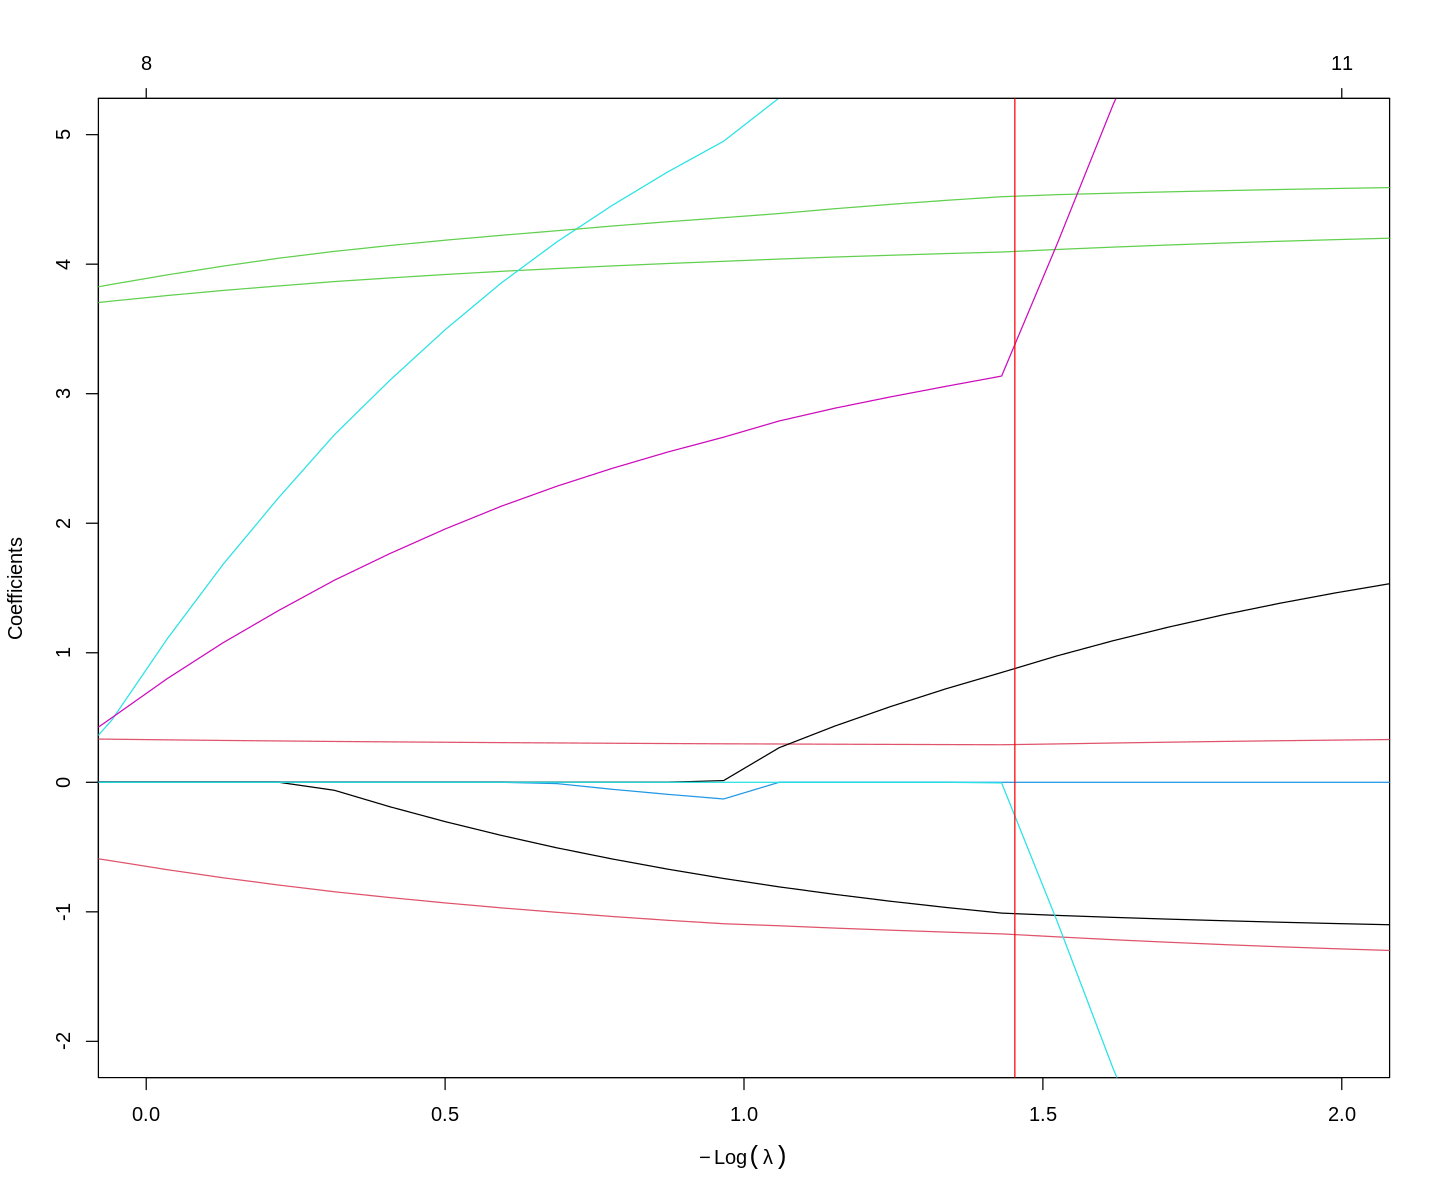

In [66]:
plot(reg.lasso, xvar = "lambda", label = TRUE,xlim=c(0,2),ylim=c(-2,5))
abline(v=log(reg.lasso.cv$lambda.1se),col="red")

[1] "CV estimate of lambda : 0.418"

14 x 1 sparse Matrix of class "dgCMatrix"
              lambda.min
(Intercept) -18.02986736
JOUR0        -0.67101204
JOUR1         .         
MOCAGE        0.29912279
TEMPE         4.00531665
STATIONAls   -0.09333231
STATIONCad    4.71348395
STATIONPla   16.73098026
STATIONRam    .         
VentMOD      -1.06568750
VentANG       4.32796699
SRMH2O       35.78513984
LNO2          .         
LNO           2.55034443

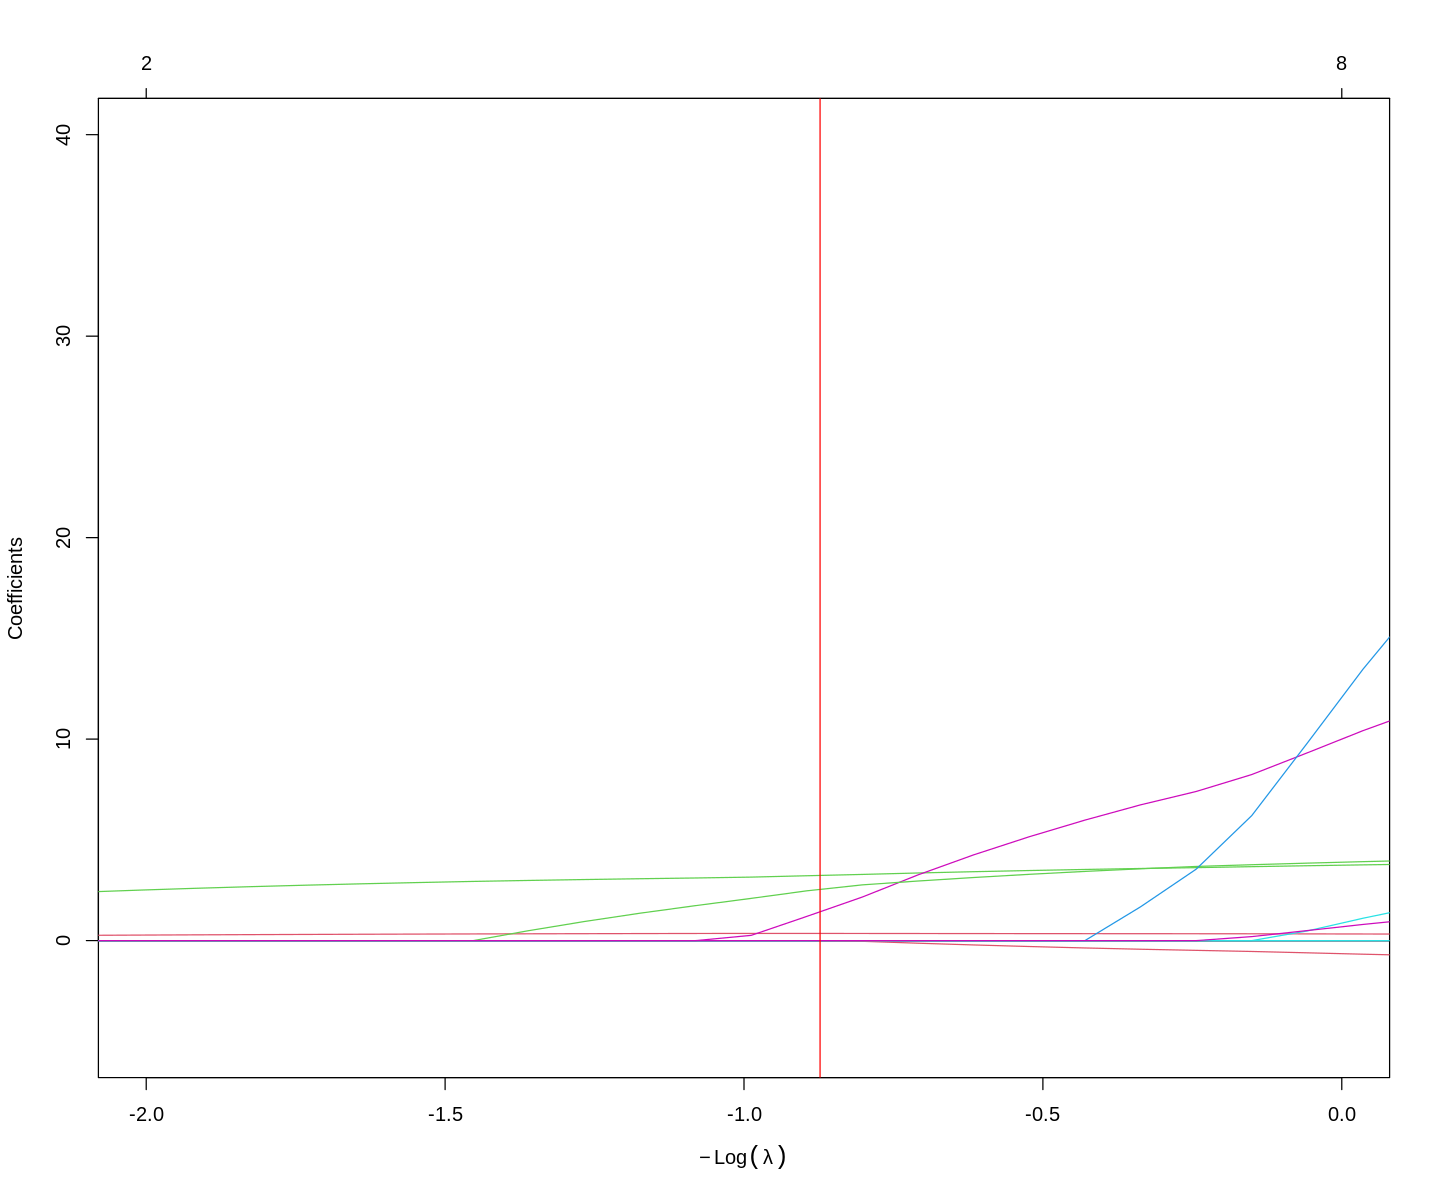

In [67]:
# valeur estimée
paste("CV estimate of lambda :", round(reg.lasso.cv$lambda.min, 3))
# modèle correspondant
coef(reg.lasso.cv, s = "lambda.min")

plot(reg.lasso, xvar = "lambda", label = TRUE,xlim=c(-2,0),ylim=c(-5,40))
abline(v=log(reg.lasso.cv$lambda.min),col="red")

In [ ]:

# ===========================
# Réponses aux questions
# ===========================

# Q1) Combien restent-ils de coefficients non nuls (lambda.1se) ?
# Dans coef(reg.lasso.cv, s="lambda.1se") :
# - non nuls : MOCAGE, TEMPE
# - tous les autres sont "." donc = 0
# => Il reste 2 coefficients non nuls (si on compte seulement les variables).
# (Si on compte aussi l'intercept : 3 coefficients non nuls au total.)

# Vérification sur les chemins de régularisation :
# À la verticale rouge (lambda.1se), on voit seulement 2 courbes (hors intercept)
# qui ne sont pas collées à 0 → cela correspond à MOCAGE et TEMPE.

# Q2) Même question avec l’autre valeur : lambda.min
# Dans coef(reg.lasso.cv, s="lambda.min") :
# non nuls (variables) = JOUR0, MOCAGE, TEMPE, STATIONALs, STATIONCad, STATIONPla,
#                        VentMOD, VentANG, SRMH2O, LNO
# et nuls = JOUR1, STATIONRam, LNO2
# => Il reste 10 coefficients non nuls (si on compte seulement les variables).
# (Si on compte aussi l'intercept : 11 coefficients non nuls au total.)

# Vérification sur les chemins :
# À la verticale rouge (lambda.min), on voit beaucoup plus de courbes non nulles
# qu’avec lambda.1se → logique car lambda.min est plus petit donc pénalisation plus faible.

# ------------------------------------------------------------
# Conclusion
# ------------------------------------------------------------
# - lambda.1se : modèle très simple (ici seulement 2 variables : MOCAGE + TEMPE)
#   -> robuste, facile à expliquer, mais parfois un peu moins précis.
#
# - lambda.min : modèle plus complexe (ici 10 variables)
#   -> potentiellement plus précis en prédiction, mais moins simple
#      (et un peu plus risqué en sur-apprentissage).

Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”


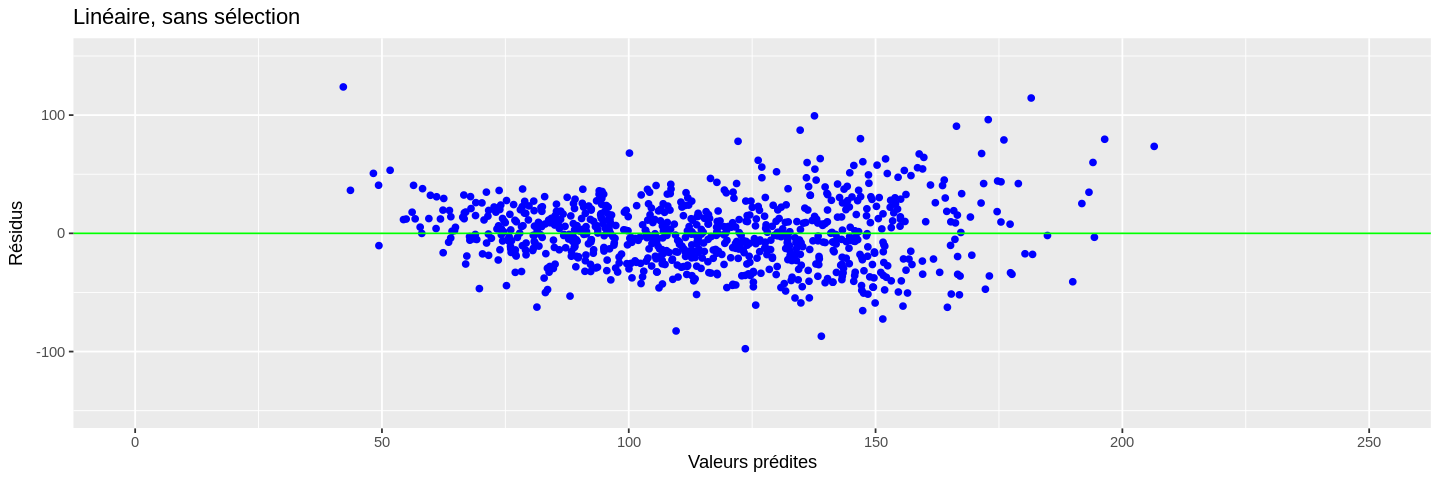

Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”


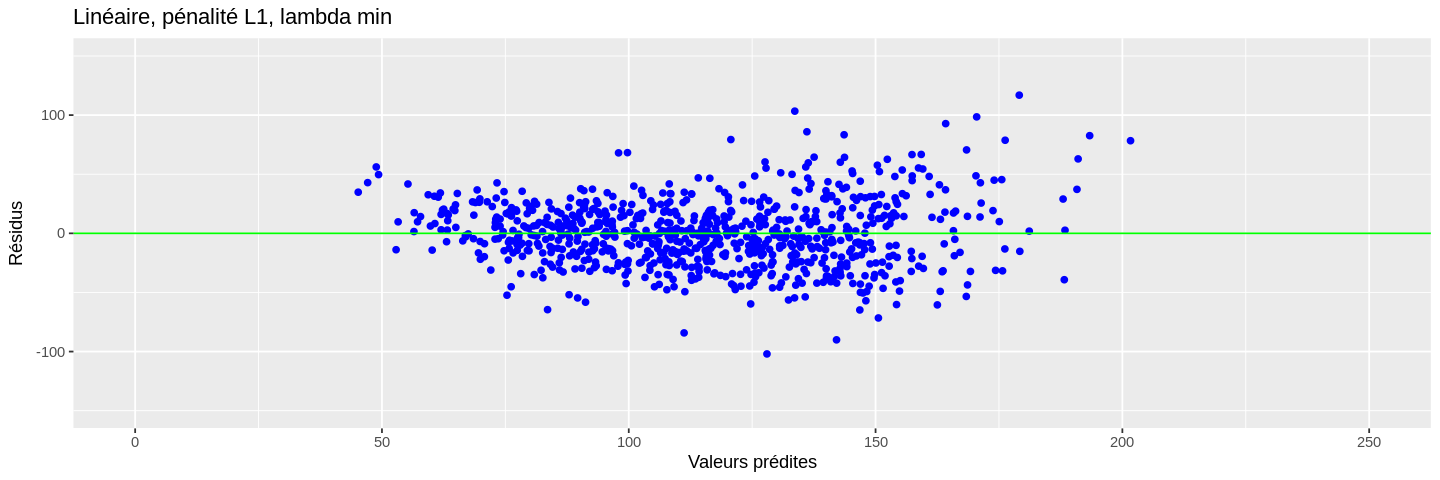

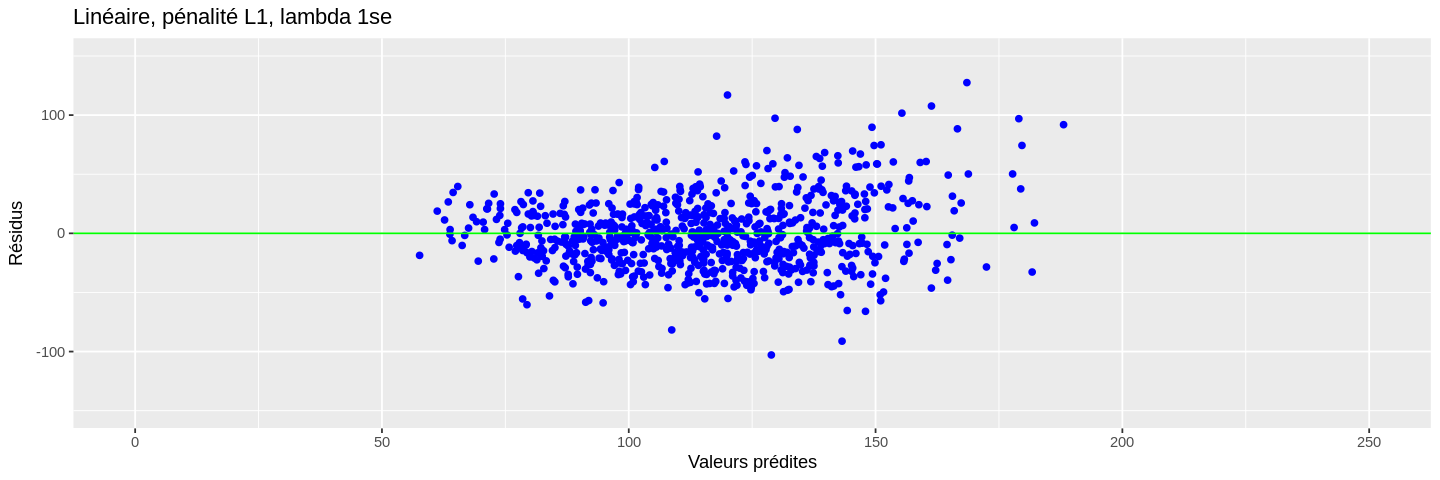

In [68]:


# Extraction des valeurs ajustées et des résidus

fit.lasso <- predict(reg.lasso.cv, s = "lambda.min", newx = x.mat)
res.lasso <- datappr$O3obs - fit.lasso

fit.lasso.1se <- predict(reg.lasso.cv, s = "lambda.1se", newx = x.mat)
res.lasso.1se <- datappr$O3obs - fit.lasso.1se

# Graphe des résidus
options(repr.plot.width = 12, repr.plot.height = 4)
par(mfrow = c(1, 3))
gplot.res(fit.lm, res.lm, "Linéaire, sans sélection")
gplot.res(fit.lasso, res.lasso, "Linéaire, pénalité L1, lambda min")
gplot.res(fit.lasso.1se, res.lasso.1se, "Linéaire, pénalité L1, lambda 1se")

In [69]:
paste("Modèle linéaire sans sélection:",mean(res.lm^2))
paste("LASSO avec lambda.min:",mean(res.lasso^2))
paste("LASSO avec lambda.1se:",mean(res.lasso.1se^2))

[1] "Modèle linéaire sans sélection: 783.549239590938"

[1] "LASSO avec lambda.min: 793.58476401389"

[1] "LASSO avec lambda.1se: 866.650281462802"

In [70]:
V=10 ; nV=floor(nrow(datappr)/V)
S=sample(1:nrow(datappr),replace=FALSE)
error.CV = c()
for(v in 1:V)
{ # Rq : les deux dernières obs sont tjs dans l'échantillon d'apprentissage...
    datappr.learn=datappr[-c(S[(nV*(v-1)):(nV*v)]),]
    datappr.valid=datappr[c(S[(nV*(v-1)):(nV*v)]),]
    error.CV=c(error.CV,mean((datappr.valid$O3obs-predict(aov(O3obs ~ ., data=datappr.learn),newdata=datappr.valid))^2))
}
mean(error.CV)


[1] 857.5651

In [ ]:

# ------------------------------------------------------------
# 1) Question : "Commentez"
# ------------------------------------------------------------
# Les trois modèles donnent des résidus globalement centrés autour de 0.
# La dispersion des résidus augmente lorsque les valeurs prédites augmentent :
# l’hypothèse d’homoscédasticité n’est donc pas parfaitement vérifiée.
# Le modèle linéaire sans sélection et le LASSO avec lambda.min donnent des nuages
# très proches. Le LASSO avec lambda.1se est plus simple mais montre des résidus
# un peu plus dispersés.


# ------------------------------------------------------------
# 2) Question : "Calculez le critère MSE pour les deux modèles.
#    Pourquoi celui obtenu par LASSO est-il moins bon ? Quel critère LASSO minimise-t-il ?"
# ------------------------------------------------------------
# - Modèle linéaire sans sélection : MSE ≈ 783.5
# - LASSO avec lambda.min         : MSE ≈ 793.6
# - LASSO avec lambda.1se         : MSE ≈ 866.7
#
# Le modèle linéaire est meilleur en apprentissage car il n’est pas pénalisé.
# Le LASSO est moins bon sur l’apprentissage car il réduit volontairement
# les coefficients pour éviter le sur-apprentissage.
# Le LASSO ne minimise pas seulement la MSE, mais une MSE pénalisée (pénalité L1),
# et la MSE de validation croisée.

# ------------------------------------------------------------
# 3) Question : "Estimez l'erreur du modèle linéaire simple par validation croisée.
#    Comparez avec celle du LASSO. Qu'observez-vous ?"
# ------------------------------------------------------------
# - Erreur CV du modèle linéaire sans sélection ≈ 857.6
# Cette erreur est plus grande que l’erreur d’apprentissage :
# le modèle linéaire sur-ajuste un peu les données.
# Le LASSO est conçu pour mieux généraliser, même si son erreur
# d’apprentissage est légèrement plus élevée.


In [ ]:
#Modèle quadratique

In [71]:

# Estimation du modèle avec toutes les interactions d'ordre 2
reg.glm <- glm(O3obs ~ .^2, data = datappr)
# Recherche du meilleur modèle au sens
# du critère d'Akaïke par méthode descendante
reg.glm.step <- step(reg.glm, direction = "backward")


Start:  AIC=7783.44
O3obs ~ (JOUR + MOCAGE + TEMPE + STATION + VentMOD + VentANG + 
    SRMH2O + LNO2 + LNO)^2

                  Df Deviance    AIC
- JOUR:STATION     4   471877 7776.5
- STATION:VentANG  4   471970 7776.7
- JOUR:TEMPE       1   471262 7781.4
- JOUR:LNO2        1   471262 7781.4
- LNO2:LNO         1   471263 7781.4
- JOUR:SRMH2O      1   471265 7781.4
- MOCAGE:TEMPE     1   471270 7781.5
- JOUR:LNO         1   471321 7781.5
- JOUR:MOCAGE      1   471324 7781.6
- VentMOD:VentANG  1   471374 7781.6
- JOUR:VentANG     1   471464 7781.8
- MOCAGE:VentANG   1   471510 7781.9
- MOCAGE:STATION   4   475115 7782.2
- JOUR:VentMOD     1   471774 7782.3
- VentANG:SRMH2O   1   471804 7782.4
- MOCAGE:SRMH2O    1   471846 7782.5
- VentMOD:LNO2     1   472012 7782.8
- TEMPE:VentMOD    1   472318 7783.3
<none>                 471261 7783.4
- VentMOD:LNO      1   472416 7783.5
- MOCAGE:VentMOD   1   472452 7783.5
- STATION:LNO      4   476488 7784.6
- VentANG:LNO2     1   473094 7784.7


In [72]:
# Coefficients du modèle
anova(reg.glm.step, test = "F")

,Df,Deviance,Resid. Df,Resid. Dev,F,Pr(>F)
,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
NULL,NA,NA,831,1394332.0,NA,NA
MOCAGE,1,469071.2081,830,925260.8,763.8571548,3.647061e-118
TEMPE,1,225512.0241,829,699748.7,367.2341644,1.630666e-67
STATION,4,10252.6125,825,689496.1,4.1739566,2.371040e-03
VentMOD,1,14316.7164,824,675179.4,23.3140002,1.652264e-06
VentANG,1,10355.9415,823,664823.5,16.8640919,4.433664e-05
SRMH2O,1,244.5782,822,664578.9,0.3982825,5.281601e-01
LNO2,1,3273.0334,821,661305.9,5.3299583,2.121919e-02
LNO,1,9138.5263,820,652167.3,14.8815971,1.238032e-04


In [73]:
# Comparer avec un modèle quadratique avec pénalité L1
x.mat2 <- model.matrix(O3obs ~ .^2 - 1, data = datappr)
reg.lasso2.cv <- cv.glmnet(y = datappr[, "O3obs"], x = x.mat2)
coef(reg.lasso2.cv, s = "lambda.1se")

74 x 1 sparse Matrix of class "dgCMatrix"
                    lambda.1se
(Intercept)        31.11429835
JOUR0               .         
JOUR1               .         
MOCAGE              .         
TEMPE               1.14877877
STATIONAls          .         
STATIONCad          .         
STATIONPla          .         
STATIONRam          .         
VentMOD             .         
VentANG             .         
SRMH2O              .         
LNO2                .         
LNO                 .         
JOUR1:MOCAGE        .         
JOUR1:TEMPE         .         
JOUR1:STATIONAls    .         
JOUR1:STATIONCad    .         
JOUR1:STATIONPla    .         
JOUR1:STATIONRam    .         
JOUR1:VentMOD       .         
JOUR1:VentANG       .         
JOUR1:SRMH2O        .         
JOUR1:LNO2          .         
JOUR1:LNO           .         
MOCAGE:TEMPE        0.01388568
MOCAGE:STATIONAls   .         
MOCAGE:STATIONCad   .         
MOCAGE:STATIONPla   .         
MOCAGE:STATIONRam   .       

Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”


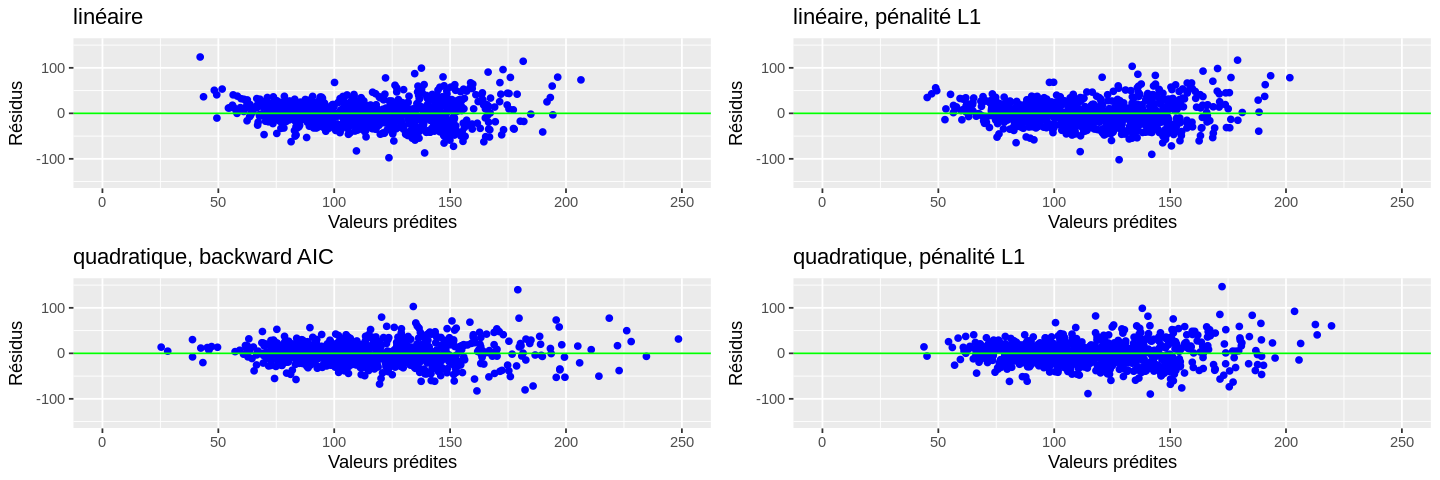

In [75]:
# --- Quadratique, backward AIC (modèle step) ---
# reg.glm.step est un modèle (lm/aov). On extrait prédictions et résidus.
fit.glm <- fitted(reg.glm.step)
res.glm <- residuals(reg.glm.step)

# --- Quadratique, pénalité L1 ---
fit.lasso2 <- as.numeric(predict(reg.lasso2.cv, s = "lambda.min", newx = x.mat2))
res.lasso2 <- datappr$O3obs - fit.lasso2

# --- (rappel) Linéaire et LASSO linéaire : assure-toi qu'ils existent ---
# fit.lm <- fitted(reg.lm); res.lm <- residuals(reg.lm)
# fit.lasso <- as.numeric(predict(reg.lasso.cv, s="lambda.min", newx=x.mat))
# res.lasso <- datappr$O3obs - fit.lasso

# Graphes des résidus
g1 <- gplot.res(fit.lm,     res.lm,     "linéaire")
g2 <- gplot.res(fit.lasso,  res.lasso,  "linéaire, pénalité L1")
g3 <- gplot.res(fit.glm,    res.glm,    "quadratique, backward AIC")
g4 <- gplot.res(fit.lasso2, res.lasso2, "quadratique, pénalité L1")

library(gridExtra)
grid.arrange(g1, g2, g3, g4, ncol = 2, nrow = 2)


In [ ]:

# ===========================
# Commentaire des 4 graphes
# ===========================
# - Linéaire : résidus centrés autour de 0, mais la dispersion augmente quand la prédiction est grande.
# - Linéaire + pénalité L1 : presque pareil que le linéaire (différences faibles).
# - Quadratique (backward AIC) : nuage un peu mieux (souvent moins de structure), mais pas parfait.
# - Quadratique + L1 : modèle plus “contrôlé” (moins de sur-ajustement), résidus souvent plus stables.
# => Globalement : aucun modèle n’est parfait, mais les modèles quadratiques peuvent capter des effets
#    d’interaction que le linéaire ne voit pas.

# ===========================
# Question : autre critère équivalent à AIC (cas gaussien, variance connue)
# ===========================
# Réponse : le critère de Mallows Cp (souvent noté Cp).
# (C’est l’équivalent “régression linéaire” quand on compare des modèles.) :contentReference[oaicite:0]{index=0}

# ===========================
# LASSO quadratique (coef(reg.lasso2.cv, s="lambda.1se"))
# Combien de coefficients non nuls ?
# ===========================
# Dans ta sortie, “.” = 0, un nombre = non nul.
#
# Non nuls (hors intercept) = 10 termes :
# 1) TEMPE
# 2) MOCAGE:TEMPE
# 3) TEMPE:VentANG
# 4) TEMPE:SRMH2O
# 5) STATIONCad:VentANG
# 6) STATIONPla:SRMH2O
# 7) STATIONCad:LNO2
# 8) STATIONRam:LNO
# 9) VentMOD:VentANG
# 10) VentMOD:SRMH2O
#
# Donc :
# - 10 coefficients non nuls (variables/termes)
# - 11 si on compte aussi l’intercept.


In [ ]:
#Prévision de l'échantillon test

In [ ]:
#Erreur de régression

In [76]:

# Calcul des prévisions pour le modèle quadratique backward AIC
pred.glm <- predict(reg.glm.step, newdata = datestr)
# Erreur quadratique moyenne de prévision (MSE)
sum((pred.glm - datestr[, "O3obs"])^2) / nrow(datestr)

[1] 601.5874

In [77]:
# Erreur quadratique par MOCAGE
sum((datestr[,"MOCAGE"] - datestr[,"O3obs"])^2) / nrow(datestr)

[1] 1384.503

In [ ]:
#Erreur de classification (matrice de confusion)

In [78]:

# Matrice de confusion pour la prévision du dépassement de seuil
table(pred.glm > 150, datestr[, "O3obs"] > 150)

       
        FALSE TRUE
  FALSE   161   19
  TRUE      5   24

In [79]:

# Matrice de confusion pour la prévision du
# dépassement de seuil par MOCAGE
table(datestr[, "MOCAGE"] > 150, datestr[, "O3obs"] > 150)

       
        FALSE TRUE
  FALSE   141   19
  TRUE     25   24

In [ ]:

# 1) Erreur de régression (MSE) sur l’échantillon test
# - Modèle quadratique (backward AIC) : MSE ≈ 601.59
# - MOCAGE seul :                       MSE ≈ 1384.50
# => Le modèle statistique prédit beaucoup mieux O3obs que MOCAGE sur le test
#    (erreur environ 2 fois plus petite).

# 2) Erreur de classification (dépassement du seuil 150) : matrice de confusion
# Pour le modèle :
# table(pred.glm > 150, O3obs > 150)
# TN = 161  (vrai NON dépassement)
# FN = 19   (dépassement réel mais prédit NON)  -> "ratés"
# FP = 5    (pas de dépassement réel mais prédit OUI) -> "fausses alertes"
# TP = 24   (dépassement réel et prédit OUI)
# => Taux d’erreur = (FP+FN)/N = (5+19)/209 ≈ 11.5%

# Pour MOCAGE :
# TN = 141, FN = 19, FP = 25, TP = 24
# => Taux d’erreur = (25+19)/209 ≈ 21.1%
# => Le modèle fait moins d’erreurs de classification que MOCAGE.

# 3) Asymétrie des erreurs (important à noter)
# Modèle : FN = 19 et FP = 5
# => Il rate plus souvent des vrais dépassements (FN) qu’il ne déclenche de fausses alertes (FP).
# MOCAGE : FN = 19 et FP = 25
# => Il fait beaucoup de fausses alertes (FP) par rapport aux ratés (FN).

# Conclusion  :
# - En régression (MSE), le modèle quadratique est nettement meilleur que MOCAGE.
# - En dépassement de seuil, le modèle est aussi meilleur, mais ses erreurs sont asymétriques :
#   il manque davantage de dépassements (FN) qu’il ne déclenche de fausses alertes (FP).


In [ ]:
#Partie3_Partie 3 : Prévision par modèle binomial

In [ ]:
#Régression logistique sans interaction

In [80]:

# estimation du modèle complet
log.lm <- glm(DepSeuil ~. , data = datappq, family = binomial)
# significativité des paramètres
anova(log.lm, test = "Chisq")

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
,<int>,<dbl>,<int>,<dbl>,<dbl>
NULL,NA,NA,831,737.8141,NA
JOUR,1,0.4443555,830,737.3698,5.050277e-01
MOCAGE,1,125.2166123,829,612.1532,4.563158e-29
TEMPE,1,136.8421803,828,475.3110,1.305601e-31
STATION,4,16.9891229,824,458.3219,1.942378e-03
VentMOD,1,11.7860664,823,446.5358,5.967570e-04
VentANG,1,0.8373860,822,445.6984,3.601454e-01
SRMH2O,1,6.4120067,821,439.2864,1.133512e-02
LNO2,1,0.1893011,820,439.0971,6.634989e-01


In [81]:

# Recherche d'un modèle optimal au sens d'Akaïke
log.lm.step <- step(log.lm, direction = "backward")

Start:  AIC=459.72
DepSeuil ~ JOUR + MOCAGE + TEMPE + STATION + VentMOD + VentANG + 
    SRMH2O + LNO2 + LNO

          Df Deviance    AIC
- MOCAGE   1   434.25 458.25
- JOUR     1   434.36 458.36
- VentANG  1   434.60 458.60
<none>         433.72 459.72
- LNO      1   439.10 463.10
- LNO2     1   439.21 463.21
- SRMH2O   1   440.49 464.49
- VentMOD  1   440.90 464.90
- STATION  4   455.47 473.47
- TEMPE    1   550.99 574.99

Step:  AIC=458.25
DepSeuil ~ JOUR + TEMPE + STATION + VentMOD + VentANG + SRMH2O + 
    LNO2 + LNO

          Df Deviance    AIC
- JOUR     1   434.79 456.79
- VentANG  1   435.23 457.23
<none>         434.25 458.25
- SRMH2O   1   441.49 463.49
- VentMOD  1   442.86 464.86
- LNO      1   447.00 469.00
- LNO2     1   451.13 473.13
- STATION  4   471.33 487.33
- TEMPE    1   558.59 580.59

Step:  AIC=456.79
DepSeuil ~ TEMPE + STATION + VentMOD + VentANG + SRMH2O + LNO2 + 
    LNO

          Df Deviance    AIC
- VentANG  1   436.01 456.01
<none>         434.79 456.79

In [82]:
# Modèle obtenu
anova(log.lm.step, test = "Chisq")

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
,<int>,<dbl>,<int>,<dbl>,<dbl>
NULL,NA,NA,831,737.8141,NA
TEMPE,1,214.189011,830,523.6251,1.674882e-48
STATION,4,32.315989,826,491.3091,1.648689e-06
VentMOD,1,29.015384,825,462.2937,7.180577e-08
SRMH2O,1,9.116772,824,453.1770,2.532764e-03
LNO2,1,5.017192,823,448.1598,2.509684e-02
LNO,1,12.150777,822,436.0090,4.906743e-04


In [ ]:
# La régression logistique sans interaction montre que la température est la
# variable la plus importante pour expliquer le dépassement du seuil d’ozone.
# La station, le vent, l’humidité et les oxydes d’azote ont également une
# influence sur le risque de dépassement.

In [83]:

# matrice de confusion de l'échantillon d'apprentissage et erreur apparente
table(log.lm.step$fitted.values > 0.5, datappq[, "DepSeuil"])

       
        FALSE TRUE
  FALSE   673   70
  TRUE     24   65

In [ ]:

# La matrice de confusion sur l’échantillon d’apprentissage indique que le
# modèle prédit bien les situations sans dépassement, mais qu’il manque encore
# une partie des épisodes de dépassement

In [ ]:
#Régression logistique avec interactions

In [84]:

# régression avec le modèle minimum
log.qm <- glm(DepSeuil ~ 1, data = datappq,family = binomial)
# algorithme stepwise en précisant le plus grand
# modèle possible
log.qm.step1 <- step(log.qm, direction = "both",
    scope = list(lower = ~1, upper = ~(JOUR + MOCAGE + TEMPE +
            STATION + VentMOD + VentANG + LNO2 + LNO + SRMH2O)^2),
    family=binomial)

Start:  AIC=739.81
DepSeuil ~ 1

          Df Deviance    AIC
+ TEMPE    1   523.63 527.63
+ MOCAGE   1   613.24 617.24
+ SRMH2O   1   683.87 687.87
+ VentANG  1   726.72 730.72
+ STATION  4   721.68 731.68
+ LNO2     1   727.76 731.76
+ VentMOD  1   733.38 737.38
<none>         737.81 739.81
+ LNO      1   736.47 740.47
+ JOUR     1   737.37 741.37

Step:  AIC=527.63
DepSeuil ~ TEMPE

          Df Deviance    AIC
+ MOCAGE   1   476.67 482.67
+ STATION  4   491.31 503.31
+ SRMH2O   1   503.12 509.12
+ VentMOD  1   515.31 521.31
+ VentANG  1   516.54 522.54
<none>         523.63 527.63
+ LNO      1   521.92 527.92
+ JOUR     1   522.78 528.78
+ LNO2     1   523.06 529.06
- TEMPE    1   737.81 739.81

Step:  AIC=482.67
DepSeuil ~ TEMPE + MOCAGE

               Df Deviance    AIC
+ SRMH2O        1   465.50 473.50
+ STATION       4   460.11 474.11
+ LNO           1   470.23 478.23
+ LNO2          1   471.61 479.61
+ VentMOD       1   473.42 481.42
+ VentANG       1   473.55 481.55
<none>  

In [85]:
anova(log.qm.step1, test = "Chisq")

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
,<int>,<dbl>,<int>,<dbl>,<dbl>
NULL,NA,NA,831,737.8141,NA
TEMPE,1,214.189011,830,523.6251,1.674882e-48
MOCAGE,1,46.956415,829,476.6687,7.258302e-12
SRMH2O,1,11.172483,828,465.4962,8.301945e-04
STATION,4,15.922320,824,449.5739,3.125190e-03
VentMOD,1,8.683311,823,440.8906,3.211370e-03
TEMPE:STATION,4,11.682335,819,429.2083,1.987666e-02
MOCAGE:VentMOD,1,5.702069,818,423.5062,1.694493e-02
SRMH2O:STATION,4,15.218744,814,408.2874,4.268380e-03


In [ ]:
# Le modèle avec interactions permet de prendre en compte les effets combinés
# entre variables, ce qui rend le modèle plus réaliste. Les interactions montrent
# que l’effet de certaines variables dépend du contexte météorologique ou du lieu.

In [ ]:
#Prévision de l'échantillon test

In [86]:
#Matrice de confusion

# Prévision du modèle quadratique
pred.log <- predict(log.qm.step1, newdata = datestq, type = "response")
# Matrice de confusion pour la prévision du
# dépassement de seuil
table(pred.log > 0.5, datestq[, "DepSeuil"])

       
        FALSE TRUE
  FALSE   164   20
  TRUE      2   23

In [ ]:
# Sur l’échantillon test, le modèle avec interactions produit peu de fausses
# alertes, mais ne détecte pas tous les dépassements. Le modèle est donc prudent

In [89]:
install.packages("ROCR")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



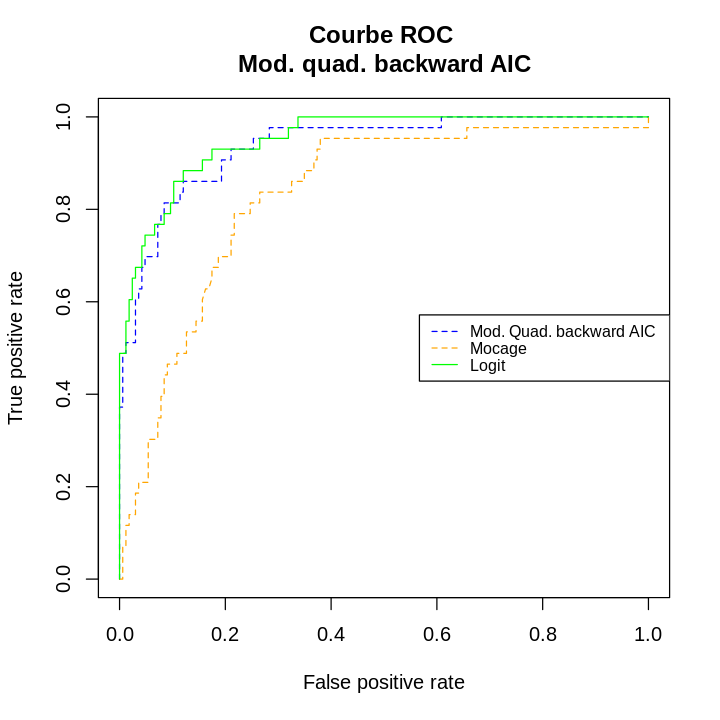

In [90]:
#Courbe ROC

library(ROCR)

options(repr.plot.width = 6, repr.plot.height = 6)
par(mfrow = c(1, 1))
rocmocage <- datestr[,  "MOCAGE"] / 300
DepSeuil=c(datestr[, "O3obs"] > 150)
predmocage <- prediction(rocmocage,DepSeuil)
perfmocage <- performance(predmocage, "tpr", "fpr")


rocglm <- pred.glm / 300
predglm <- prediction(rocglm,DepSeuil)
perfglm <- performance(predglm, "tpr", "fpr")

roclogit <- predict(log.qm.step1, newdata = datestq, type="response")
predlogit <- prediction(roclogit, datestq[, "DepSeuil"])
perflogit <- performance(predlogit, "tpr", "fpr")

plot(perfglm, col = "blue",lty=2, main = "Courbe ROC \n Mod. quad. backward AIC ")
plot(perfmocage,col="orange",lty=2,add=TRUE)
plot(perflogit,col="green",lty=1,add=TRUE)

legend("right", legend=c("Mod. Quad. backward AIC", "Mocage", "Logit"),
       col=c("blue","orange","green"), lty=c(2,2,1), text.font=1,    cex=0.8)

In [ ]:
# Les courbes ROC montrent que les modèles logistique et gaussien ont des
# performances proches et supérieures à celles du modèle MOCAGE. Cela confirme
# que les approches statistiques sont efficaces pour la prévision des
# dépassements d’ozone.

In [ ]:
# Question 1 : Que sont la sensibilité et la spécificité d’une courbe ROC ?

# La sensibilité est la capacité du modèle à détecter les vrais dépassements
# d’ozone, c’est-à-dire parmi les vrais dépassements combien sont bien prédits.

# La spécificité est la capacité du modèle à reconnaître les situations sans
# dépassement, c’est-à-dire parmi les non-dépassements combien sont bien classés.
# Dans une courbe ROC, on trace la sensibilité en fonction de 1 - spécificité
# lorsque le seuil de décision varie.

# Question 2 : Les performances des deux approches gaussiennes et binomiales
# sont-elles très différentes ?

# Non, les performances ne sont pas très différentes. Les courbes ROC du modèle
# gaussien quadratique et du modèle logistique sont proches, ce qui montre que
# les deux approches donnent des résultats comparables.

# Question 3 : Sur le graphe ci-dessus, ajouter la courbe ROC pour le modèle
# déterministe MOCAGE. Qu’observez-vous ?

# La courbe ROC du modèle MOCAGE est en dessous des autres courbes. Cela signifie
# que MOCAGE détecte moins bien les dépassements d’ozone pour un même taux de
# fausses alertes. Les modèles statistiques sont donc plus performants que
# le modèle déterministe MOCAGE.


In [91]:
install.packages(c(
  "gridExtra",   # affichage de plusieurs graphes
  "GGally",      # ggpairs
  "plotly",      # graphes interactifs (optionnel)
  "ggfortify",   # autoplot (ACP, lm…)
  "pROC"         # AUC et ROC alternatifs
))


Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
#Partie4_Arbre de décision binaire (CART)

In [ ]:
#Estimation et élagage de l'arbre de régression

In [92]:
library(rpart)
help(rpart)
help(rpart.control)

In [93]:
tree.reg=rpart(O3obs~.,data=datappr,control=rpart.control(cp=0.001))

In [95]:
install.packages("rpart.plot")
library(rpart.plot)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



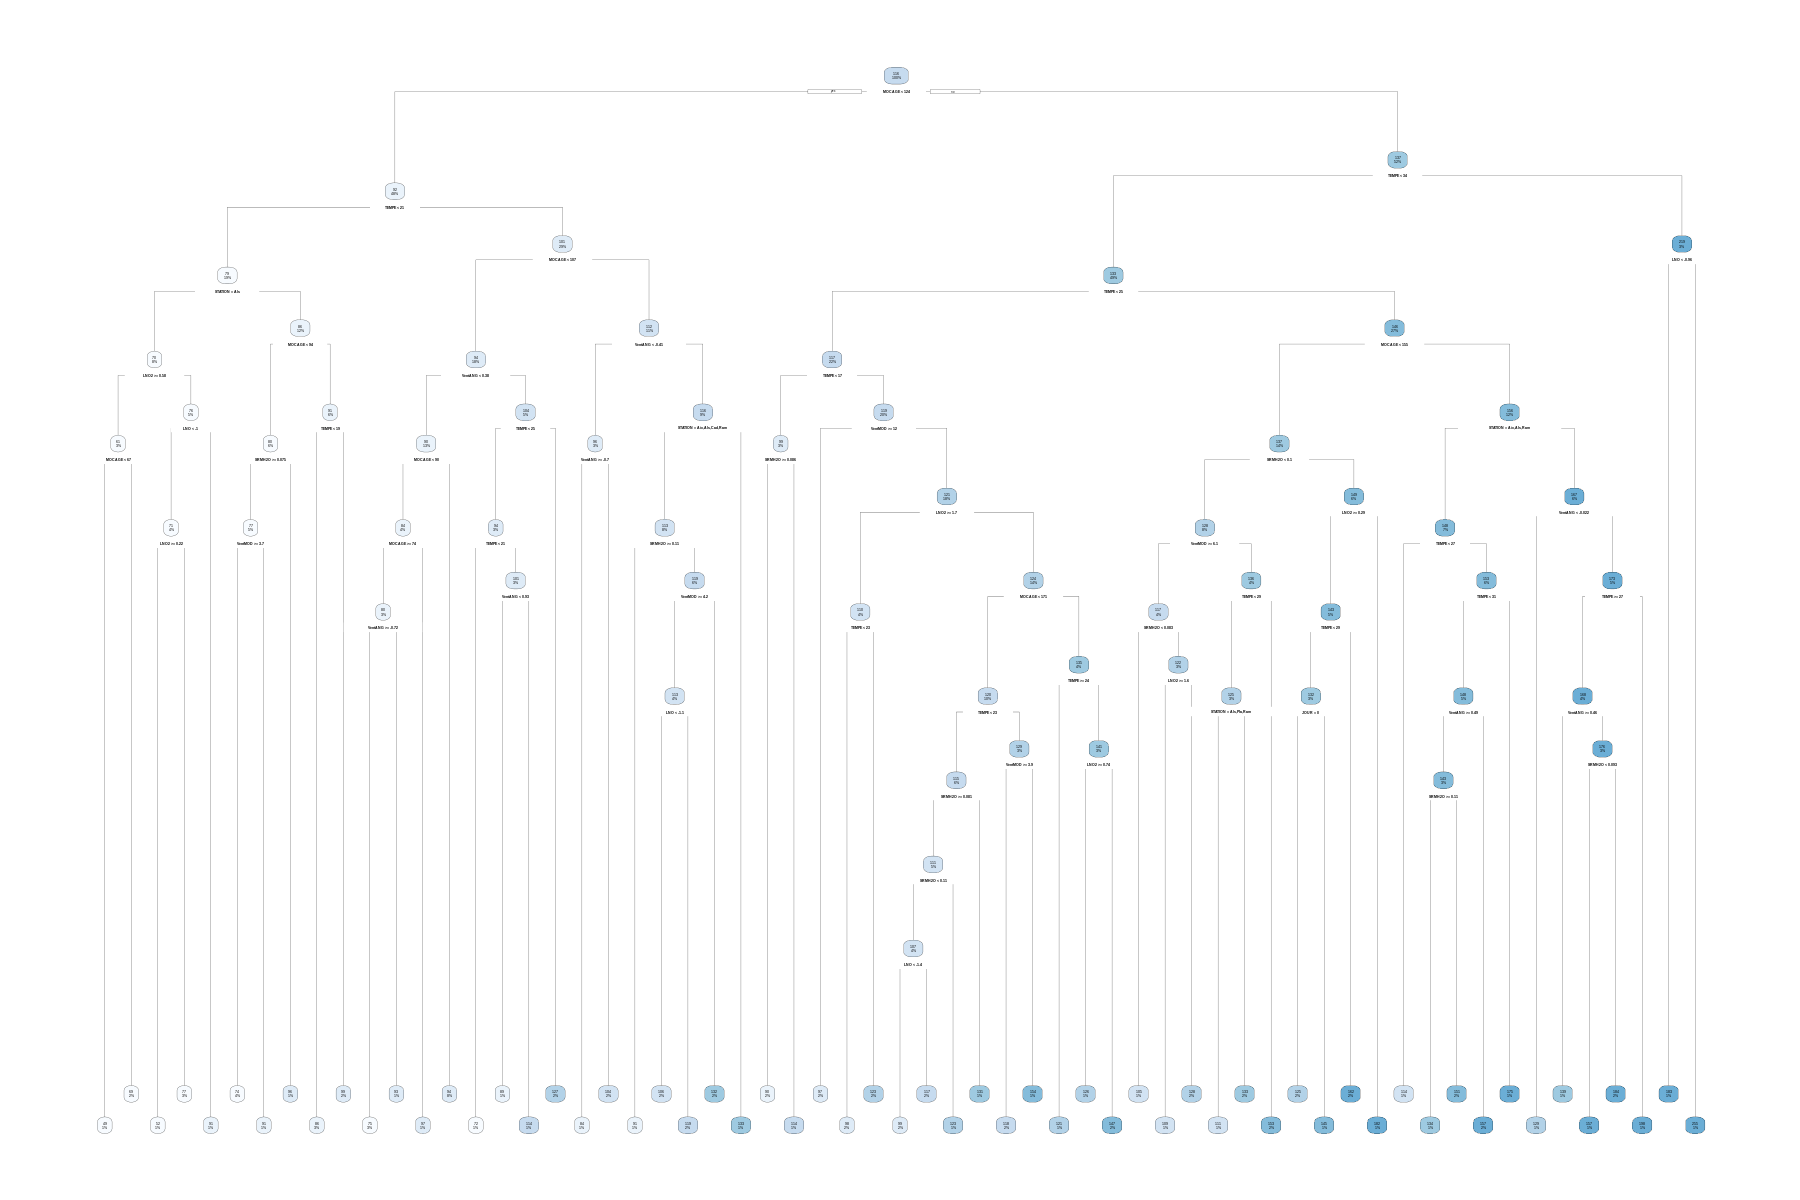

In [96]:
library(rpart.plot)
options(repr.plot.width = 15, repr.plot.height = 10)
rpart.plot(tree.reg)

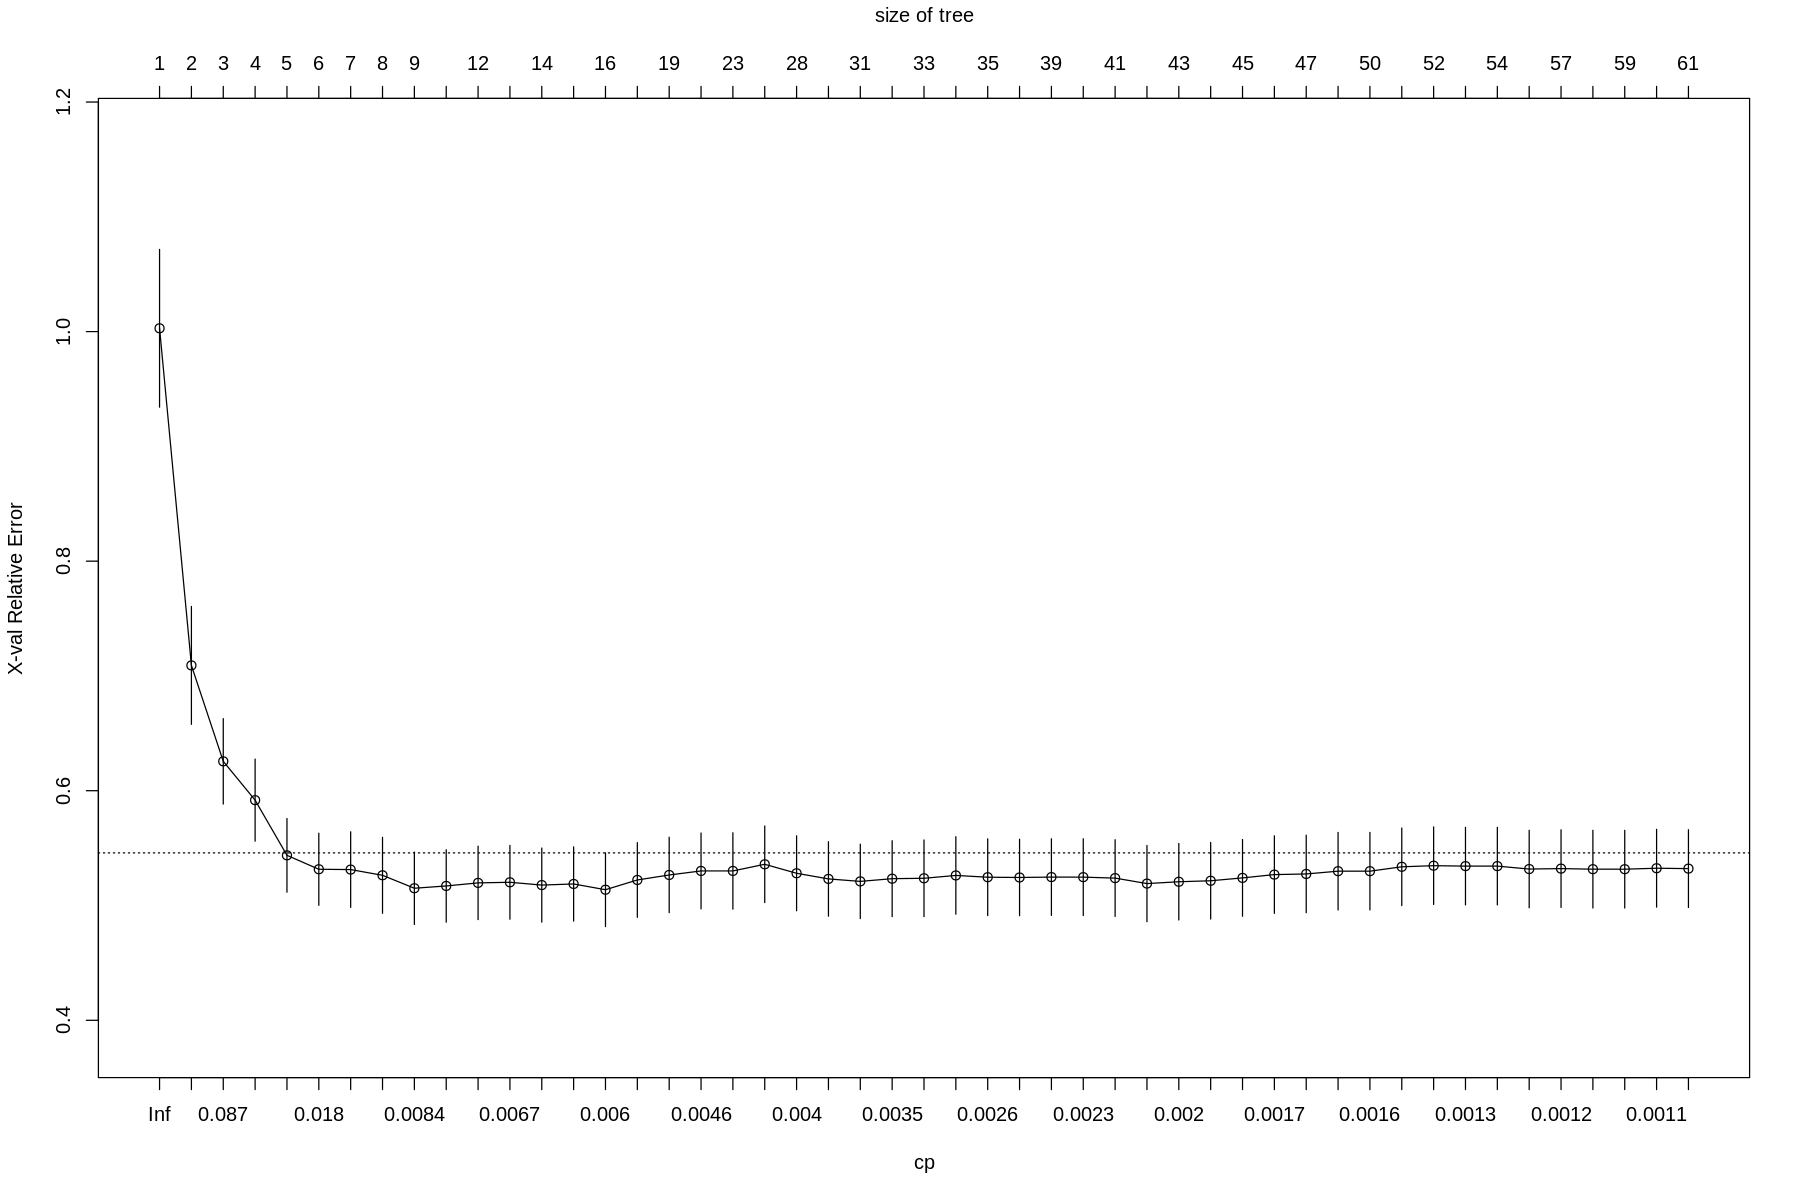

In [97]:

help(xpred.rpart)
xmat<-xpred.rpart(tree.reg,xval=10)
# one row for each observation and one column for each complexity value

# Cross-validation error par valeur de CP
CVerr<-apply((xmat-datappr[,"O3obs"])^2,2,sum)

plotcp(tree.reg)

[1] 0.00836254

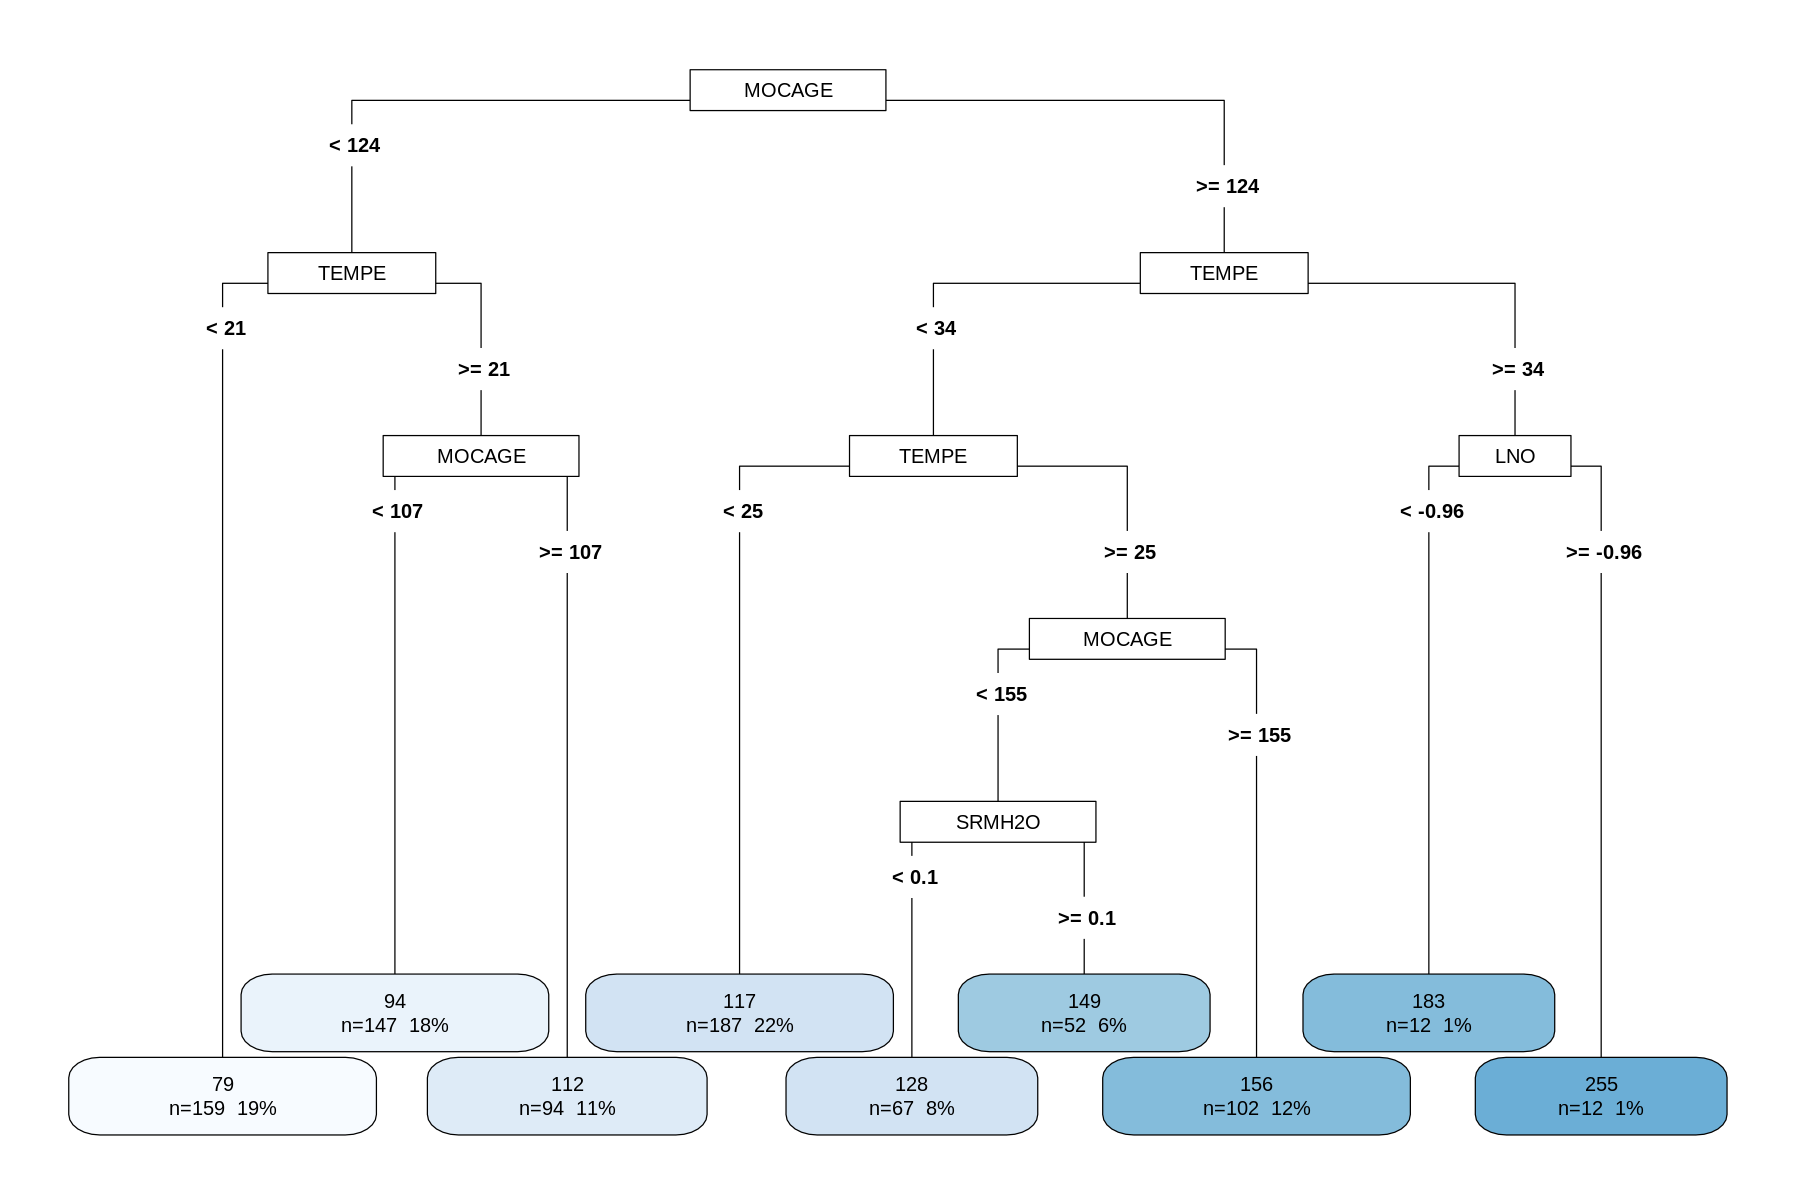

In [98]:
as.numeric(attributes(which.min(CVerr))$names)
tree.reg=rpart(O3obs~.,data=datappr,control=rpart.control(cp=as.numeric(attributes(which.min(CVerr))$names)))
rpart.plot(tree.reg,type=5,extra=101)

In [100]:
install.packages("partykit")
library(partykit)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘libcoin’, ‘inum’


Loading required package: grid

Loading required package: libcoin

Loading required package: mvtnorm



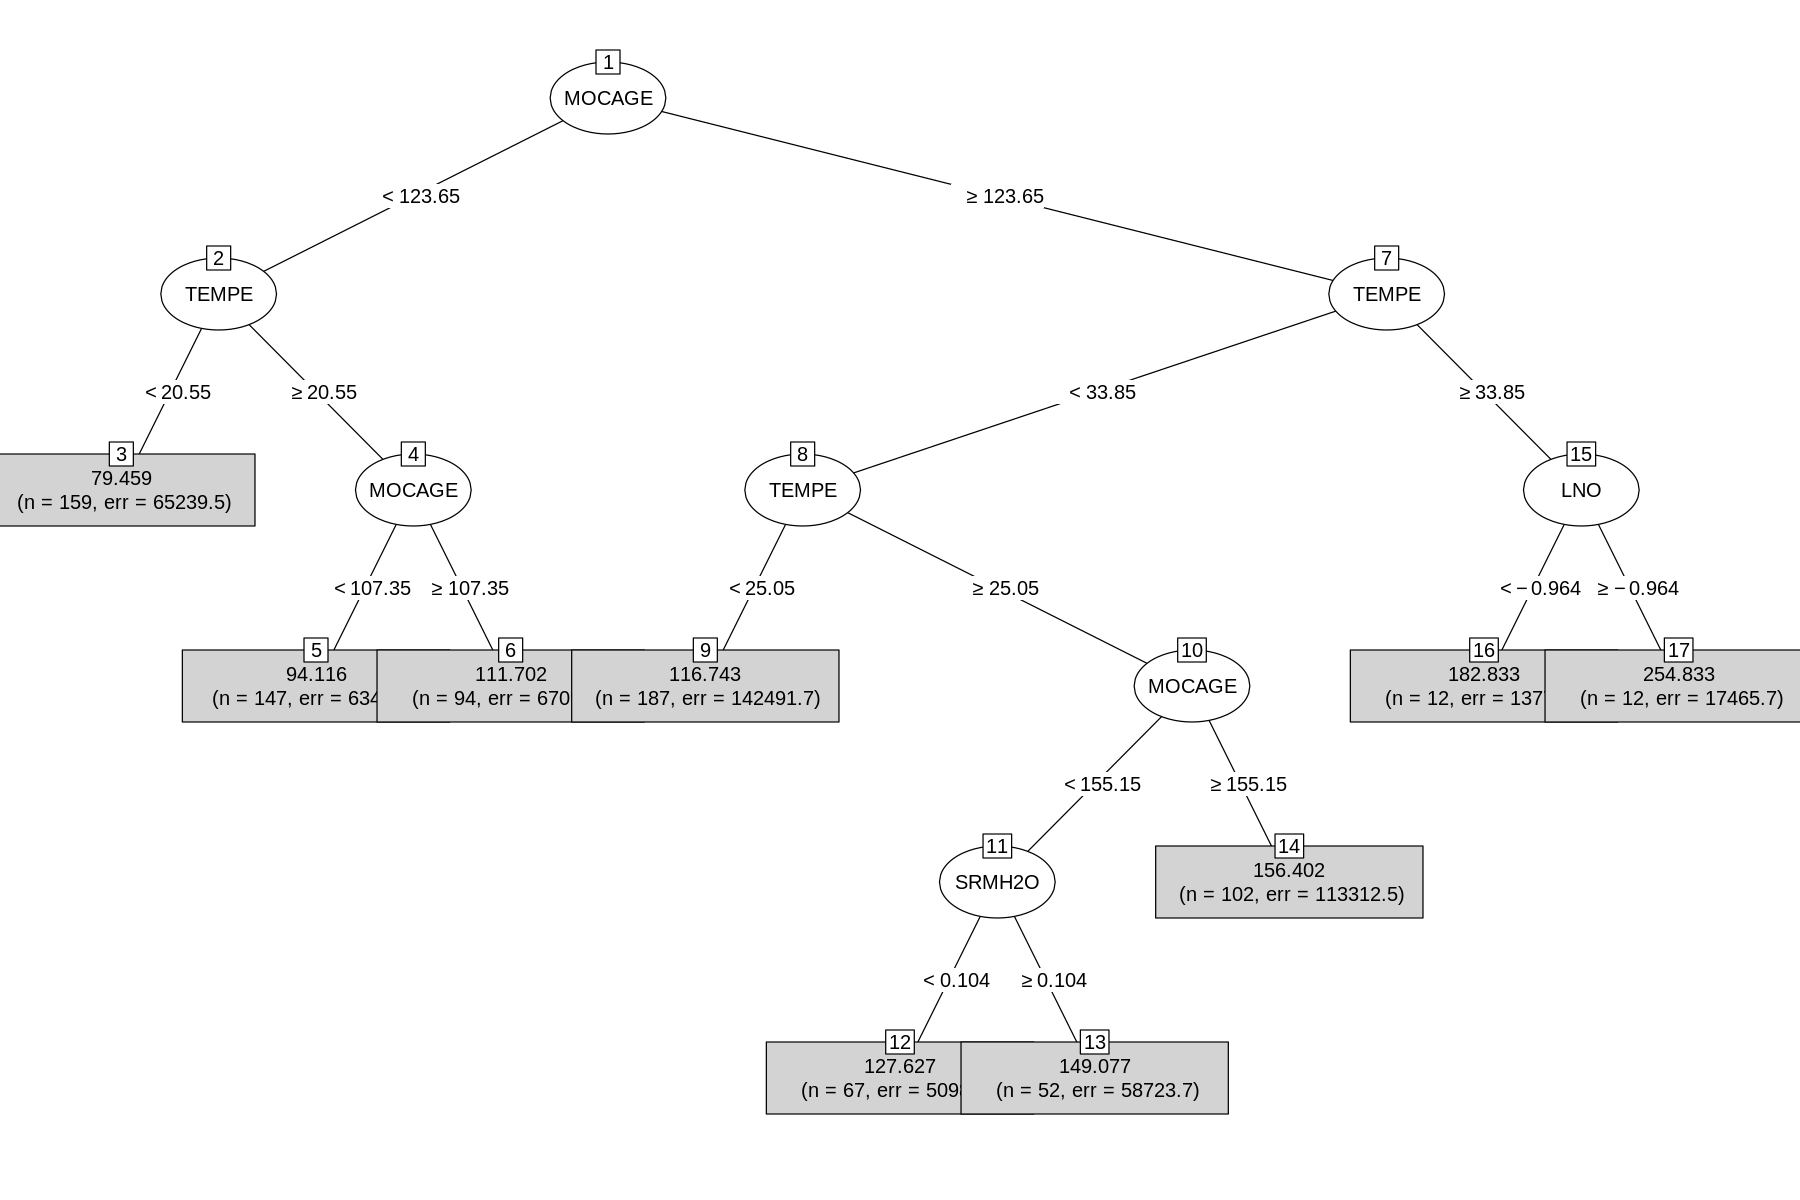

In [101]:
library(partykit)
plot(as.party(tree.reg), type="simple")

Warning message:
“Removed 12 rows containing missing values or values outside the scale range
(`geom_point()`).”


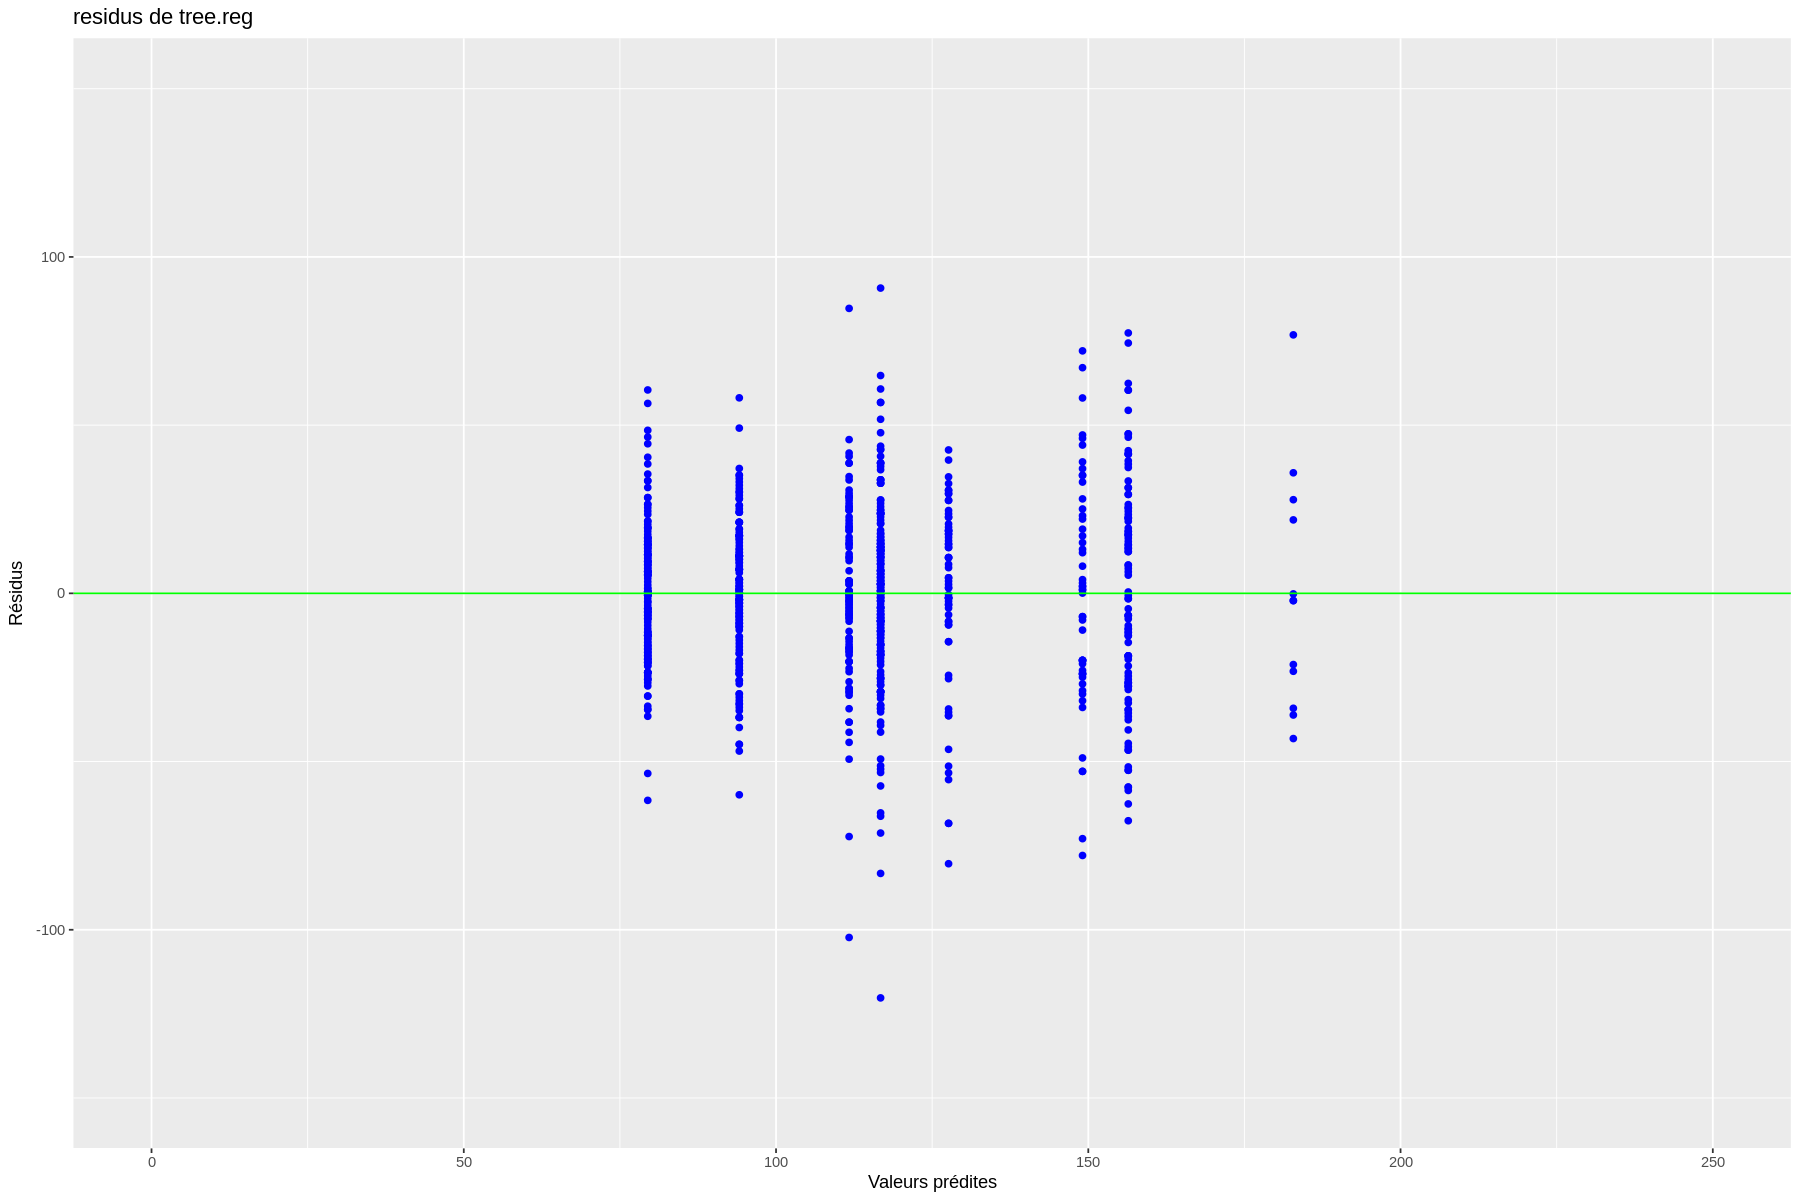

In [102]:
fit.tree=predict(tree.reg)
res.tree=fit.tree-datappr[,"O3obs"]
gplot.res(fit.tree,res.tree,"residus de tree.reg")

In [104]:
install.packages("caret")
library(caret)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘sparsevctrs’, ‘e1071’, ‘ModelMetrics’, ‘recipes’


Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift




Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


[1] "Valeur de cp retenue = 0.00411687358372697"


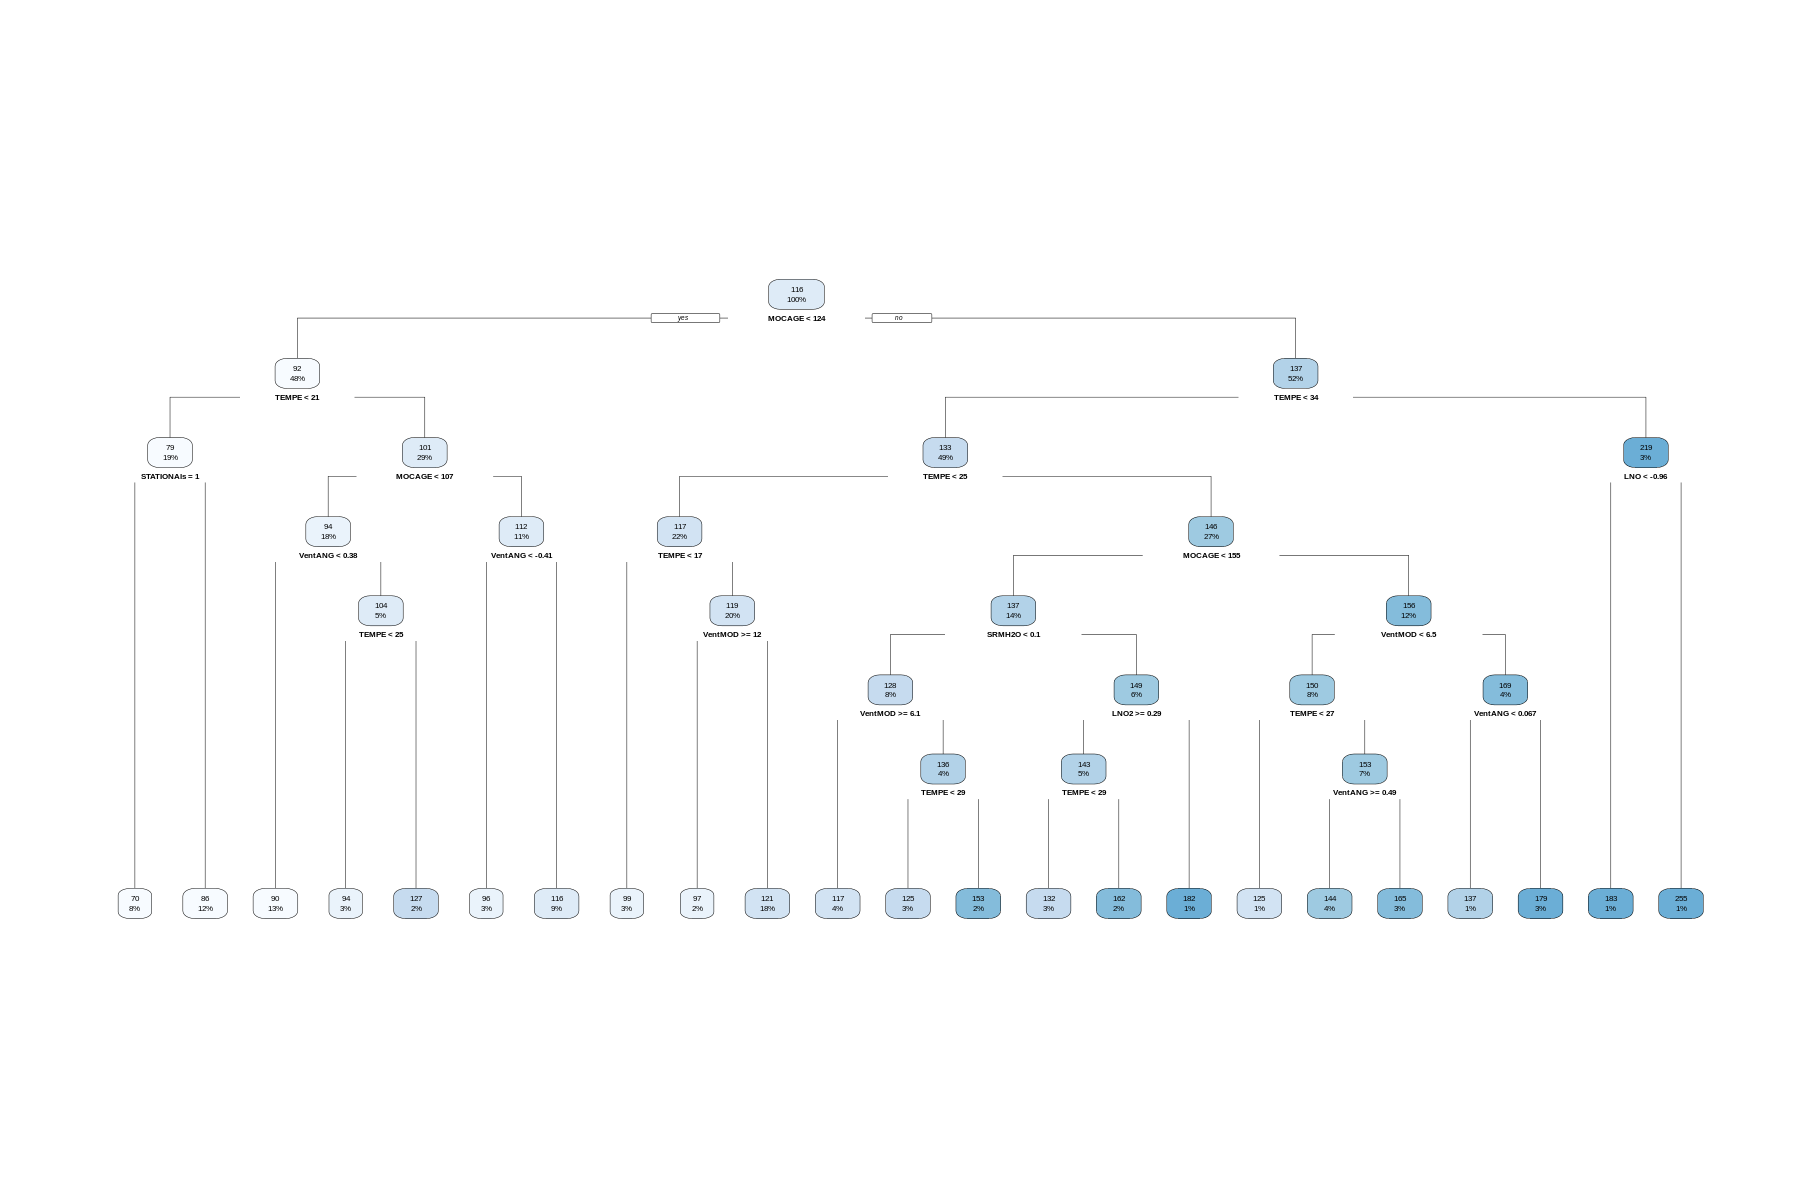

In [107]:

ctrl <- trainControl(method = "cv",number = 10)
treecaret <- train(O3obs~.,data=datappr,method = "rpart",trControl = ctrl,tuneLength =20)
print(paste("Valeur de cp retenue = ",treecaret$bestTune,sep=""))
rpart.plot(treecaret$finalModel)

In [ ]:

# Pourquoi élaguer l’arbre ?
# - L’arbre de départ a trop de feuilles.
# - Il s’adapte trop aux données d’apprentissage.
# - Il risque donc de mal prédire de nouvelles données.
# - L’élagage permet d’avoir un arbre plus simple et plus stable.
#
# Question 1 : Quel critère est optimisé pour créer un nœud ?
# - À chaque séparation, l’arbre cherche à réduire l’erreur.
# - L’erreur correspond à la différence entre valeurs observées
#   et valeurs prédites dans les feuilles.
# - On cherche donc à minimiser l’erreur quadratique.
#
# Question 2 : Quelle est la variable la plus importante ?
# - La variable la plus importante est MOCAGE.
# - Elle se trouve à la racine de l’arbre.
# - C’est la première variable utilisée pour séparer les données.
#
# Question 3 : Pourquoi le graphe des résidus a cette forme ?
# - Un arbre donne une valeur unique par feuille.
# - Il y a donc peu de valeurs prédites différentes.
# - Les points du graphe forment des colonnes verticales.

In [ ]:
#Estimation et élagage d'un arbre de discrimination

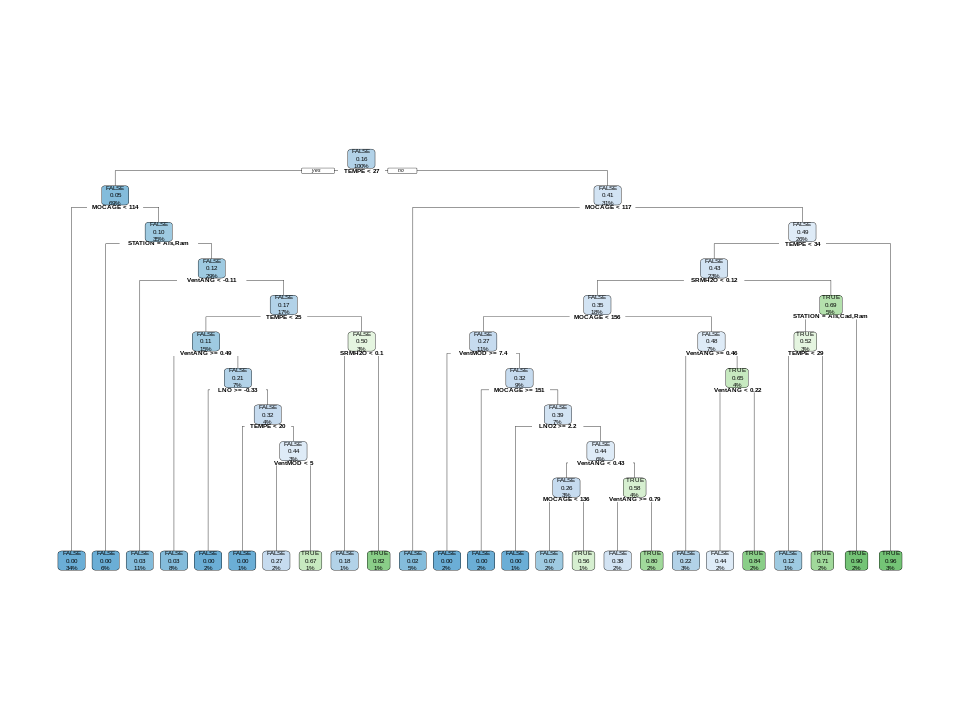

In [128]:
tree.dis=rpart(DepSeuil~.,data=datappq,parms=list(split="information"),cp=0.001)
rpart.plot(tree.dis)

In [129]:

xmat = xpred.rpart(tree.dis)
# Comparaison des valeurs prédite et observée
xerr=datappq$DepSeuil!= (xmat>1.5)
# Calcul  des estimations des taux d'erreur
CVerr=apply(xerr, 2, sum)/nrow(xerr)
CVerr


0.525925926 0.045961754 0.030089031 0.018144368 0.012394963 0.009799079 
  0.1622596   0.1466346   0.1454327   0.1406250   0.1466346   0.1478365 
0.008281733 0.002721655 
  0.1466346   0.1466346

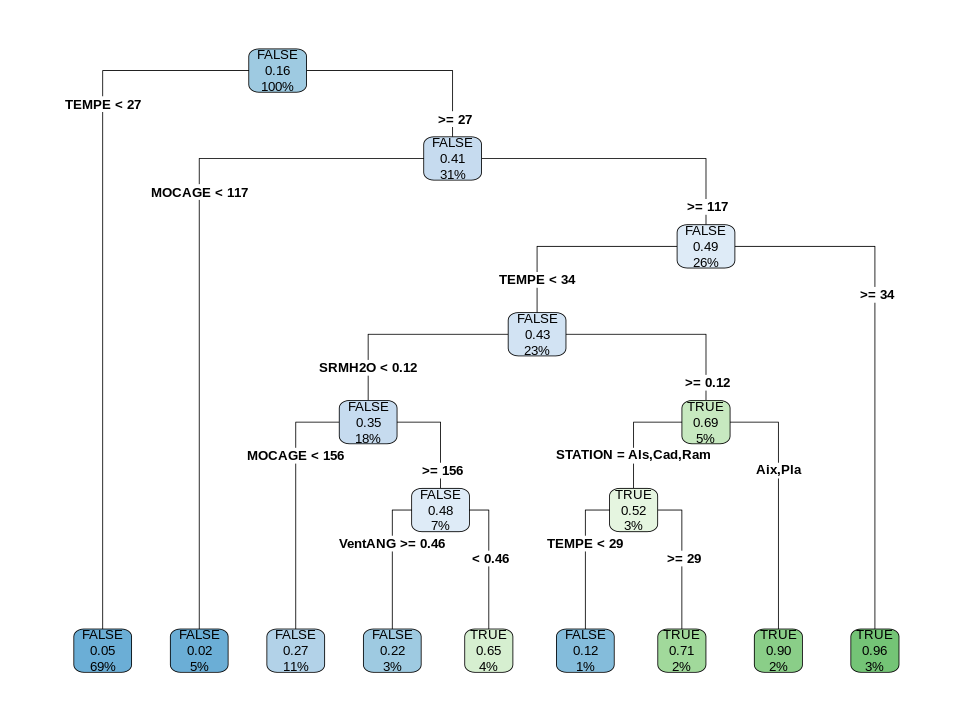

In [130]:

tree.dis=rpart(DepSeuil~.,data=datappq,parms=list(split="information"),cp=as.numeric(attributes(which.min(CVerr))$names))
rpart.plot(tree.dis,type=4)

[1] "Valeur de cp retenue = 0.0064327485380117"


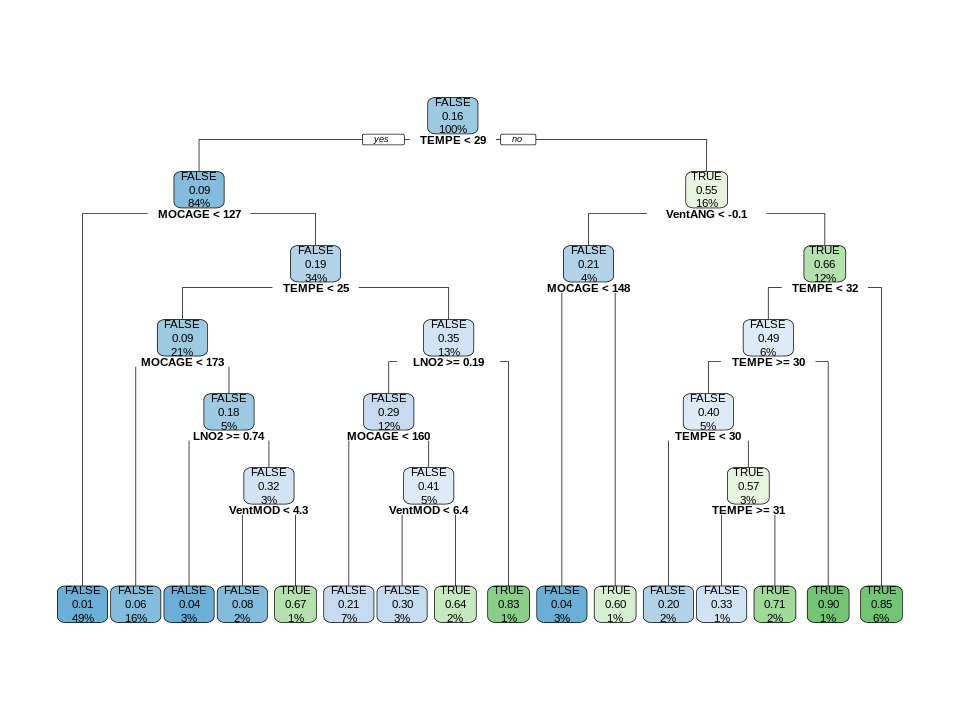

In [133]:
ctrl <- trainControl(method = "cv",number = 10)
treecaret <- train(DepSeuil~.,data=datappq,method = "rpart",trControl = ctrl,tuneLength =20,metric="Accuracy")
print(paste("Valeur de cp retenue = ",treecaret$bestTune,sep=""))
rpart.plot(treecaret$finalModel)

In [ ]:
# Question : Quel autre critère d’hétérogénéité est utilisé ?
# - Le critère par défaut en classification est Gini.
# - Ici on a choisi split="information" :
#   -> c’est le critère "information" (entropie / gain d’information).
#
# Interprétation des arbres:
# - Le premier arbre (cp=0.001) est très grand : beaucoup de feuilles.
#   -> risque de sur-apprentissage, et difficile à interpréter.
#
# - Ensuite on calcule CVerr (taux de mal classés) pour plusieurs cp.
#   -> on choisit le cp qui donne la plus petite valeur de CVerr
#      (dans la liste, la plus petite valeur est environ 0.0027).
#   -> on obtient alors un arbre élagué (plus petit et plus lisible).
#
# - Dans l’arbre élagué (rpart.plot type=4), on voit que TEMPE est très importante
#   car elle est en haut de l’arbre (premières séparations).
#   On voit aussi MOCAGE et SRMH2O et VentANG dans certaines branches.
#
# - Avec caret, le cp retenu est ~0.0064 : l’arbre devient très petit.
#   -> il garde seulement les séparations les plus utiles (ex : TEMPE puis VentANG).
#   -> c’est normal que ce ne soit pas le même arbre : caret teste une autre grille de cp
#      et optimise Accuracy avec sa procédure de CV.

In [ ]:
#Prévision de l'échantillon test

In [134]:
#Erreur de régression
# Calcul des prévisions
pred.treer=predict(tree.reg,newdata=datestr)
# Erreur quadratique moyenne de prévision en régression
sum((pred.treer-datestr[,"O3obs"])^2)/nrow(datestr)

[1] 830.7395

In [ ]:
# --- Erreur de régression (TreeReg)
# MSE (test) = 830.7395
# -> c’est l’erreur moyenne au carré sur la prédiction de O3obs.
# (Plus c’est petit, mieux c’est pour la régression.)

In [135]:
#Erreur de classification (matrice de confusion)
# Matrice de confusion pour la prévision du
# dépassement de seuil (régression)
  #table(pred.treer>150,datestr[,"O3obs"]>150)
confusionMatrix(as.factor(pred.treer>150),as.factor(datestr[,"O3obs"]>150))$table

          Reference
Prediction FALSE TRUE
     FALSE   157   24
     TRUE      9   19

In [ ]:
# 1) Dépassement via TreeReg (seuil 150)
#  TN=157, FP=9,  FN=24, TP=19   (total = 209)
#  -> Accuracy = (TN+TP)/total = (157+19)/209 ≈ 0.842
#  -> Sensibilité (détecter TRUE) = TP/(TP+FN) = 19/43 ≈ 0.442
#  -> Spécificité (détecter FALSE) = TN/(TN+FP) = 157/166 ≈ 0.946
#  Interprétation : peu de faux positifs (9), mais beaucoup de faux négatifs (24)
#  => il rate pas mal de vrais dépassements.

In [136]:

# Même chose pour l'arbre de discrimination
pred.treeq=predict(tree.dis,newdata=datestq,type="class")
  #table(pred.treeq,datestq[,"DepSeuil"])
confusionMatrix(pred.treeq,datestq[,"DepSeuil"])$table

          Reference
Prediction FALSE TRUE
     FALSE   162   22
     TRUE      4   21

In [ ]:
# 2) TreeDis (classification directe)
#  TN=162, FP=4,  FN=22, TP=21   (total = 209)
#  -> Accuracy = (162+21)/209 ≈ 0.876
#  -> Sensibilité = 21/43 ≈ 0.488
#  -> Spécificité = 162/166 ≈ 0.976
#  Interprétation : moins de faux positifs (4 au lieu de 9) et un peu plus de vrais positifs (21).
#
# Question : Quelle stratégie semble meilleure à ce niveau ?
# -> Pour la classification sur le test (matrice de confusion),
#    l’arbre de discrimination (TreeDis) est meilleur :
#    Accuracy plus grande et moins de faux positifs.

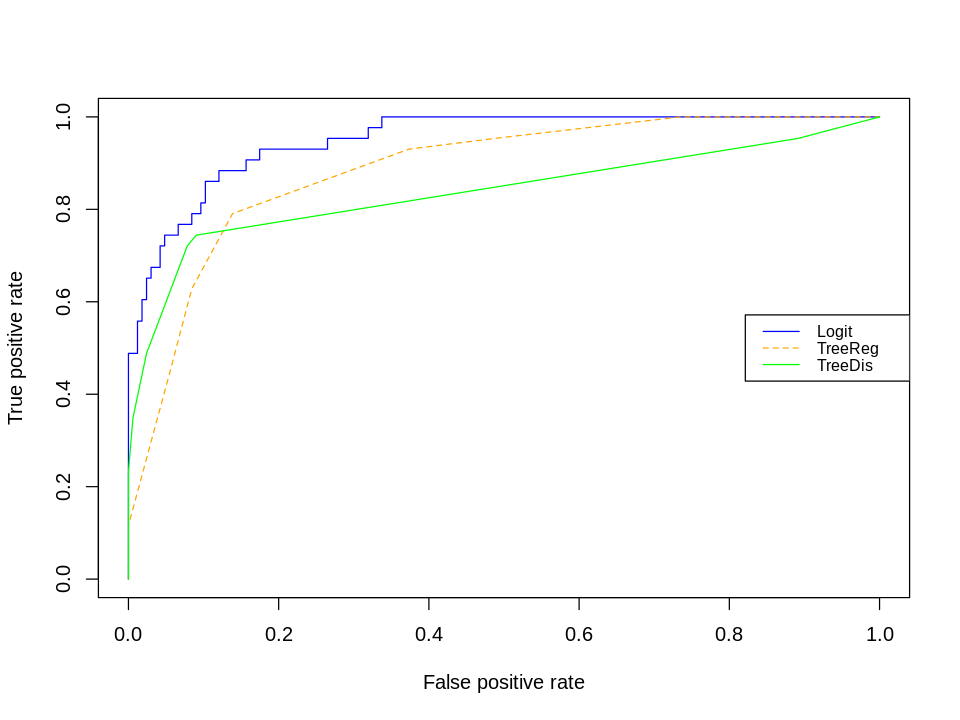

In [137]:
#Courbes ROC

ROCregtree=pred.treer/300
predregtree=prediction(ROCregtree,datestq$DepSeuil)
perfregtree=performance(predregtree,"tpr","fpr")
ROCdistree=predict(tree.dis,newdata=datestq,type="prob")[,2]
preddistree=prediction(ROCdistree,datestq$DepSeuil)
perfdistree=performance(preddistree,"tpr","fpr")
# tracer les courbes ROC en les superposant
# pour mieux comparer

options(repr.plot.width = 8, repr.plot.height = 6)
plot(perflogit,col="blue")
plot(perfregtree,col="orange",lty=2,add=TRUE)
plot(perfdistree,col="green",add=TRUE)

legend("right", legend=c("Logit", "TreeReg", "TreeDis"),
       col=c("blue","orange","green"), lty=c(1,2,1), text.font=1,    cex=0.8)

In [ ]:
# --- Courbes ROC (qualité de prévision globale en discrimination)
# Sur la figure ROC :
# - La courbe bleue (Logit) est globalement au-dessus : meilleure séparation TRUE/FALSE.
# - La courbe orange (TreeReg) est en dessous de Logit.
# - La courbe verte (TreeDis) est la plus faible sur ce graphe.
#
# Question : Une meilleure méthode se dégage-t-elle ?
# -> Oui pour la ROC : Logit est la meilleure (courbe la plus haute).
# -> Mais si on regarde seulement la matrice de confusion au seuil 150,
#    TreeDis est un peu meilleur que TreeReg.
# Conclusion : pas une seule méthode “gagnante” partout.
# - Pour ROC (tous les seuils) : Logit > TreeReg > TreeDis.
# - Pour la décision au seuil 150 sur le test : TreeDis > TreeReg.

In [ ]:
#Partie5_Réseaux de neurones

In [ ]:
#Introduction

# Question 1 :
# Quelle fonction de transfert est utilisée pour le dernier neurone ?
#
# - En régression :
#   -> Fonction identité (sortie linéaire)
#   -> La sortie est une valeur réelle (ex : concentration d’ozone)
#
# - En classification binaire :
#   -> Fonction logistique (sigmoïde)
#   -> La sortie est une probabilité entre 0 et 1
#
# - En classification multiclasse :
#   -> Fonction softmax
#   -> La sortie est un vecteur de probabilités dont la somme vaut 1


# Question 2 :
# Quel est le choix par défaut pour les neurones de la couche cachée ?
#
# - Par défaut (librairie nnet) :
#   -> Fonction de transfert logistique (sigmoïde)
#   -> Elle permet de modéliser des relations non linéaires
#   -> Tous les neurones cachés utilisent cette même fonction


# Question 3 :
# Quel est le paramètre decay de la fonction nnet ?
#
# - Le paramètre decay correspond à une pénalisation des poids
# - Il s’agit d’une régularisation de type L2
# - Son rôle est de limiter la taille des poids
# - Cela permet de réduire le sur-apprentissage


# Question 4 :
# Indiquez une autre façon d’éviter le sur-apprentissage
#
# - Utiliser la validation croisée
# - Réduire le nombre de neurones dans la couche cachée
# - Utiliser un échantillon test indépendant
# - Arrêter l’apprentissage plus tôt (early stopping)


In [ ]:
#Cas de la régression

In [138]:
library(MASS)
library(nnet)
# apprentissage
# attention au paramètre linout dans le cas de la régression
nnet.reg=nnet(O3obs~.,data=datappr,size=5,decay=1,linout=TRUE,maxit=500)
summary(nnet.reg)


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select




# weights:  71
initial  value 12515402.710873 
iter  10 value 1349800.195755
iter  20 value 1163847.503365
iter  30 value 1009473.918357
iter  40 value 949405.726689
iter  50 value 890051.150880
iter  60 value 854219.986840
iter  70 value 810240.698415
iter  80 value 795765.243245
iter  90 value 751737.632067
iter 100 value 745714.970801
iter 110 value 737962.731235
iter 120 value 724143.622307
iter 130 value 712605.423345
iter 140 value 700026.528423
iter 150 value 673599.275887
iter 160 value 660838.592712
iter 170 value 645762.649995
iter 180 value 638321.289929
iter 190 value 619868.408571
iter 200 value 602650.259288
iter 210 value 596772.392950
iter 220 value 581267.171357
iter 230 value 561267.543589
iter 240 value 532364.982198
iter 250 value 522823.504762
iter 260 value 519531.129433
iter 270 value 518211.330406
iter 280 value 517872.386795
iter 290 value 517462.899786
iter 300 value 517376.128466
iter 310 value 517194.127585
iter 320 value 516927.426257
iter 330 value 516368.

a 12-5-1 network with 71 weights
options were - linear output units  decay=1
  b->h1  i1->h1  i2->h1  i3->h1  i4->h1  i5->h1  i6->h1  i7->h1  i8->h1  i9->h1 
 -38.98    1.55   -0.05    0.88    4.15    1.33    8.40    0.88    0.31    1.59 
i10->h1 i11->h1 i12->h1 
  39.45    5.03   -3.66 
  b->h2  i1->h2  i2->h2  i3->h2  i4->h2  i5->h2  i6->h2  i7->h2  i8->h2  i9->h2 
  -5.26  -22.39   -0.07    1.18  -16.85   -9.58    8.59  -21.64   -0.14   -3.42 
i10->h2 i11->h2 i12->h2 
   5.42    2.23   -1.38 
  b->h3  i1->h3  i2->h3  i3->h3  i4->h3  i5->h3  i6->h3  i7->h3  i8->h3  i9->h3 
   0.89   14.74   -0.82    2.20  -10.97   18.78   21.28    7.40   -0.19    2.95 
i10->h3 i11->h3 i12->h3 
   0.54   17.30  -12.13 
  b->h4  i1->h4  i2->h4  i3->h4  i4->h4  i5->h4  i6->h4  i7->h4  i8->h4  i9->h4 
  -3.14    0.78    0.02    0.16    0.51    0.93    0.75    1.36   -0.06    0.03 
i10->h4 i11->h4 i12->h4 
  -2.40   -2.36    2.86 
  b->h5  i1->h5  i2->h5  i3->h5  i4->h5  i5->h5  i6->h5  i7->h5  i8->h5  i9

In [ ]:
# 1) Question : Contrôlez le nombre de poids estimés.
# - Le résumé du modèle indique un réseau 12-5-1 avec 71 poids.
# - Vérification par le calcul :
#   (nombre de variables + 1) × neurones cachés + (neurones cachés + 1) × sortie
#   => (12 + 1) × 5 + (5 + 1) × 1 = 71
# - Le nombre de poids estimés est donc correct.

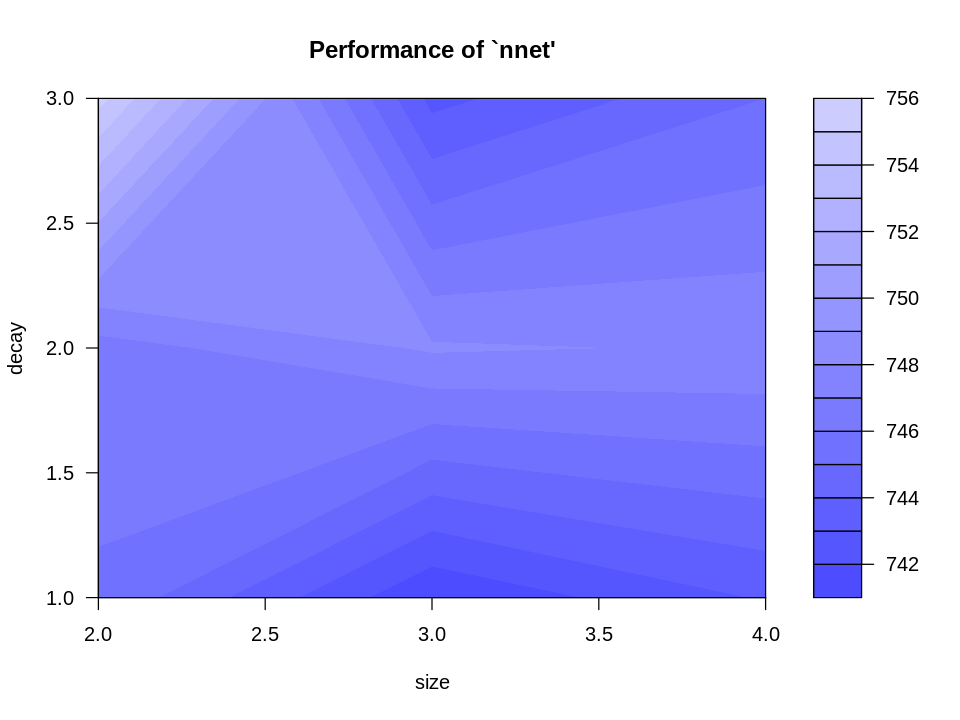

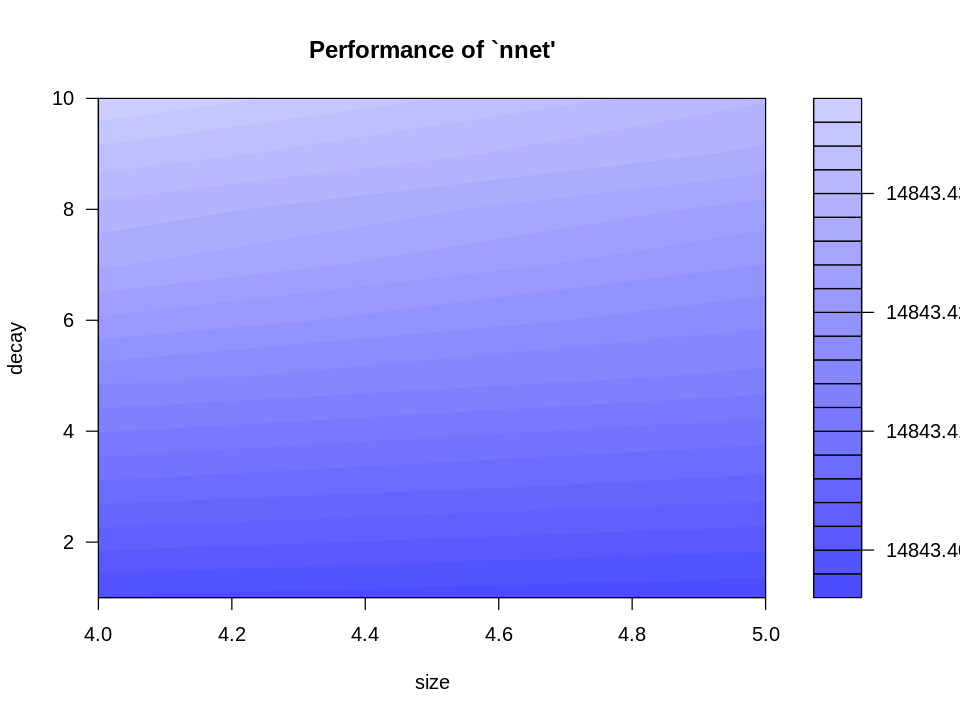

In [140]:
library(e1071)
plot(tune.nnet(O3obs~.,data=datappr,size=c(2,3,4),decay=c(1,2,3),maxit=200,linout=TRUE))
plot(tune.nnet(O3obs~.,data=datappr,size=4:5,decay=1:10))

In [ ]:
#  Choix (size, decay) via tune.nnet
# - Les cartes de performance montrent une zone meilleure (plus foncée) autour de size≈3 et decay≈2.
# - On retient donc un modèle supposé optimal : size=3, decay=2 (comme demandé).


In [ ]:
# 2) Question : Ré-estimez le modèle supposé optimal.
# → J’ai repris nnet avec les paramètres choisis (size=3, decay=2).
# → J’ai recalculé les prédictions sur l’échantillon d’apprentissage.
# → J’ai calculé les résidus : prédiction – observation.
# → J’ai commenté le graphe des résidus pour vérifier :
#   - centrage autour de 0
#   - présence ou non d’erreurs importantes.

# weights:  43
initial  value 12690848.508937 
iter  10 value 1391773.832031
iter  20 value 1378568.949335
iter  30 value 1220775.946156
iter  40 value 1037146.325322
iter  50 value 988639.841792
iter  60 value 962194.746414
iter  70 value 936707.852270
iter  80 value 857435.282872
iter  90 value 817146.020104
iter 100 value 774496.622987
iter 110 value 733754.971324
iter 120 value 717081.575574
iter 130 value 657335.203530
iter 140 value 629375.880677
iter 150 value 620822.042984
iter 160 value 615884.941949
iter 170 value 609442.798696
iter 180 value 601530.002453
iter 190 value 584372.844166
iter 200 value 560766.543277
final  value 560766.543277 
stopped after 200 iterations


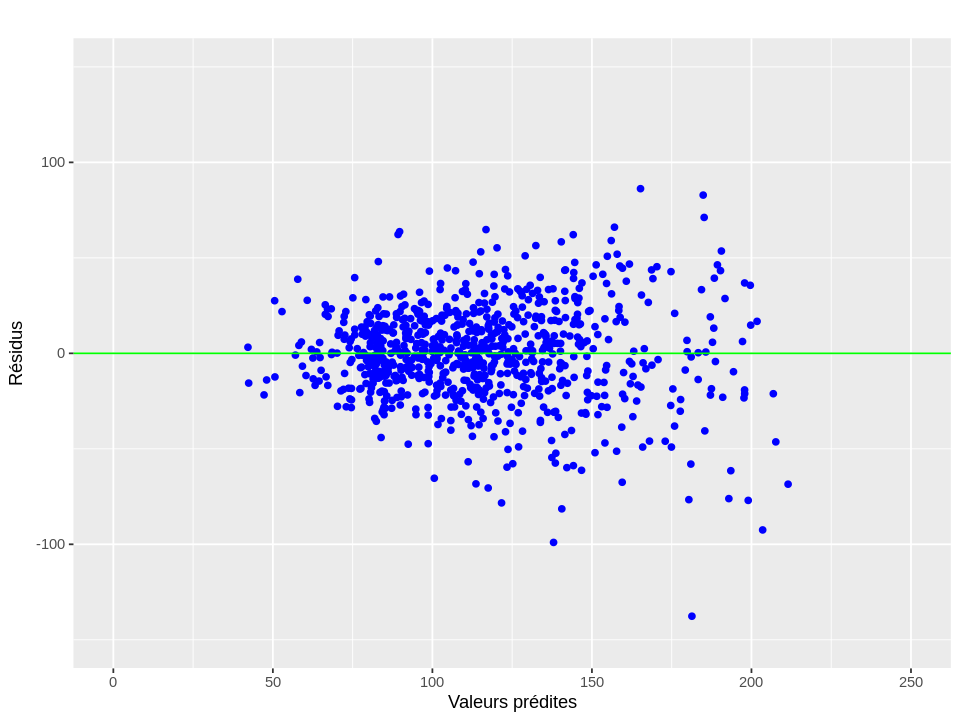

In [141]:
nnet.reg=nnet(O3obs~.,data=datappr,size=3,decay=2,linout=TRUE,maxit=200)
# calcul et graphe des résidus
fit.nnetr=predict(nnet.reg,data=datappr)
res.nnetr=fit.nnetr-datappr[,"O3obs"]
gplot.res(fit.nnetr,res.nnetr,titre="")

In [143]:
#Graphe des résidus (fit vs résidus)
# - Les résidus sont globalement centrés autour de 0 -> pas de biais énorme.
# - Mais on voit une dispersion plus grande quand les valeurs prédites sont élevées :
#   => erreurs plus fortes pour les fortes concentrations d’ozone .
# - On observe quelques points très éloignés (outliers) : le réseau se trompe beaucoup sur certains jours.

In [ ]:
#Cas de la discrimination

In [144]:
# apprentissage
nnet.dis=nnet(DepSeuil~.,data=datappq,size=5,decay=0)
summary(nnet.reg)

# weights:  71
initial  value 685.528965 
iter  10 value 368.794332
iter  20 value 350.769947
iter  30 value 280.152869
iter  40 value 236.915569
iter  50 value 225.009826
iter  60 value 217.735688
iter  70 value 217.131684
iter  80 value 216.684012
iter  90 value 216.603348
iter 100 value 216.599109
final  value 216.599109 
stopped after 100 iterations


a 12-3-1 network with 43 weights
options were - linear output units  decay=2
  b->h1  i1->h1  i2->h1  i3->h1  i4->h1  i5->h1  i6->h1  i7->h1  i8->h1  i9->h1 
 -10.41    0.15    0.02    0.29    1.47    0.59    1.31    0.28   -0.06    0.04 
i10->h1 i11->h1 i12->h1 
  21.05   -1.63    1.93 
  b->h2  i1->h2  i2->h2  i3->h2  i4->h2  i5->h2  i6->h2  i7->h2  i8->h2  i9->h2 
   3.91   -0.09   -0.01    0.20   -3.19    1.12    0.79   -0.02    0.04    0.16 
i10->h2 i11->h2 i12->h2 
 -31.77   -1.38    0.57 
  b->h3  i1->h3  i2->h3  i3->h3  i4->h3  i5->h3  i6->h3  i7->h3  i8->h3  i9->h3 
  -0.83    0.05   -0.08    0.12   -0.58    0.51   -0.96    1.77    0.36   -0.41 
i10->h3 i11->h3 i12->h3 
  26.80    0.92   -1.23 
  b->o  h1->o  h2->o  h3->o 
 53.09 107.82  59.70 -34.41 

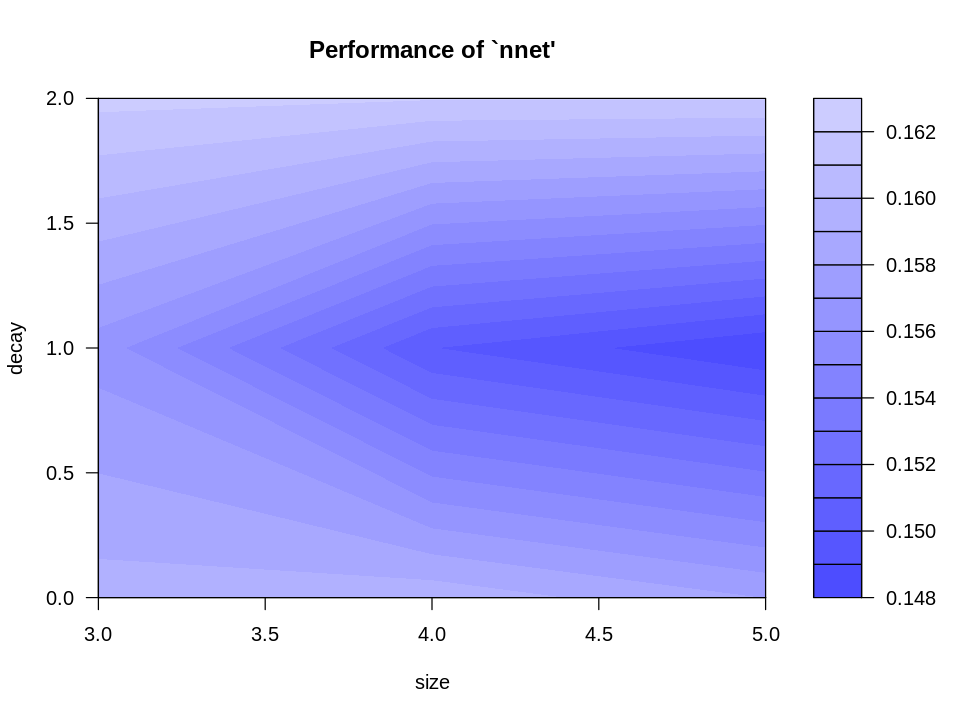

In [145]:
plot(tune.nnet(DepSeuil~.,data=datappq,size=c(3,4,5),decay=c(0,1,2),maxit=200,linout=FALSE))

In [146]:

nnet.dis=nnet(DepSeuil~.,data=datappq,size=5,decay=1)

# weights:  71
initial  value 407.447359 
iter  10 value 369.376572
iter  20 value 351.029822
iter  30 value 319.171960
iter  40 value 299.685777
iter  50 value 292.478495
iter  60 value 285.217210
iter  70 value 278.554536
iter  80 value 274.494092
iter  90 value 272.673427
iter 100 value 270.991485
final  value 270.991485 
stopped after 100 iterations


In [ ]:
# Interprétation de tune.nnet (carte "Performance of nnet") :
# - La performance affichée correspond à l’erreur estimée en validation croisée.
# - Plus la valeur est petite (zone la plus foncée), meilleur est le couple (size, decay).
# - Sur ton graphique, la meilleure zone est autour de :
#   -> size = 5
#   -> decay = 1
#
# Question : Notez la taille et le decay optimaux et ré-estimez le modèle pour ces valeurs.
# Réponse :
# - Paramètres optimaux retenus : size=5 et decay=1.
# - Ré-estimation faite avec :
#   nnet.dis = nnet(DepSeuil ~ ., data=datappq, size=5, decay=1)
#
# Remarque importante :
# - Les résultats changent un peu à chaque exécution (initialisation aléatoire des poids),
#   donc le "meilleur" couple peut varier légèrement, mais ici (5,1) est un bon choix.


In [ ]:
#Prévisions de l'échantillon test

In [148]:
#Erreur de régression

# Calcul des prévisions
pred.nnetr=predict(nnet.reg,newdata=datestr)
pred.nnetq=predict(nnet.dis,newdata=datestq)
# Erreur quadratique moyenne de prévision
sum((pred.nnetr-datestr[,"O3obs"])^2)/nrow(datestr)

[1] 538.0933

In [ ]:
# --- 1) Erreur de régression (MSE) ---
# MSE = 538.0933
# - Plus c’est petit, mieux le modèle prédit O3obs.

In [149]:
#Erreur de classification (matrice de confusion)

# Matrice de confusion pour la prévision du
# dépassement de seuil (régression)
table(pred.nnetr>150,datestr[,"O3obs"]>150)
confusionMatrix(as.factor(pred.nnetr>150),as.factor(datestr[,"O3obs"]>150))$table

# Même chose pour la discrimination
table(pred.nnetq>0.5,datestq[,"DepSeuil"])


       
        FALSE TRUE
  FALSE   160   19
  TRUE      6   24

          Reference
Prediction FALSE TRUE
     FALSE   160   19
     TRUE      6   24

       
        FALSE TRUE
  FALSE   165   30
  TRUE      1   13

In [ ]:
# --- 2) Matrice de confusion : dépassement via la régression (pred.nnetr > 150) ---
# (Prédit en ligne / Réel en colonne)
#          Réel FALSE  Réel TRUE
# Prédit FALSE    160       19   -> 19 dépassements ratés (FN)
# Prédit TRUE       6       24   -> 6 fausses alertes (FP), 24 bons dépassements (TP)
#
# Mesures importantes :
# - Accuracy = (160+24)/209 = 0.880
# - Sensibilité (TPR) = 24/(24+19) = 0.558  (capte ~56% des dépassements)
# - Spécificité (TNR) = 160/(160+6) = 0.964 (très bon pour dire "pas de dépassement")
# --- 3) Matrice de confusion : discrimination directe (pred.nnetq > 0.5) ---
#          Réel FALSE  Réel TRUE
# Prédit FALSE    165       30   -> 30 dépassements ratés (FN)
# Prédit TRUE       1       13   -> très peu de fausses alertes (FP=1)
#
# Mesures :
# - Accuracy = (165+13)/209 = 0.852
# - Sensibilité (TPR) = 13/(13+30) = 0.302  (capte seulement ~30% des dépassements)
# - Spécificité (TNR) = 165/(165+1) = 0.994 (excellent, presque aucune fausse alerte)
#
# Interprétation :
# - nnetq est "trop prudent" : il évite les fausses alertes (FP très faible),
#   mais il rate beaucoup de vrais dépassements (FN élevé).
# - nnetr (via seuil 150) détecte mieux les dépassements (sensibilité plus grande)
#   et a aussi une meilleure accuracy globale.

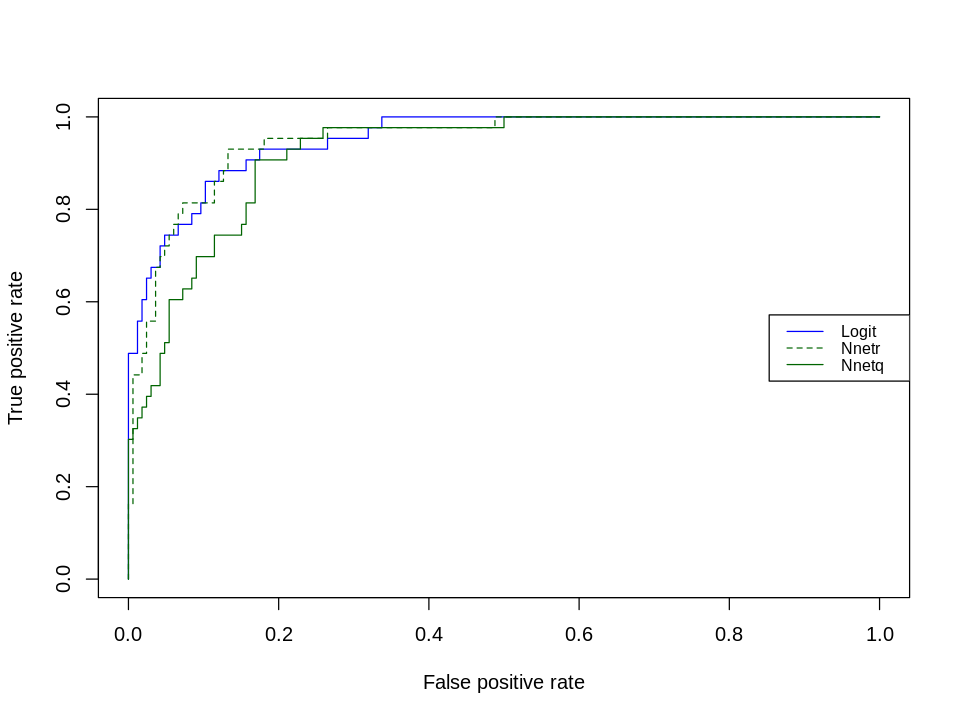

In [150]:
#Courbes ROC

library(ROCR)


roclogit <- predict(log.qm.step1, newdata = datestq, type="response")
predlogit <- prediction(roclogit, datestq[, "DepSeuil"])
perflogit <- performance(predlogit, "tpr", "fpr")


rocnnetr=pred.nnetr/300
prednnetr=prediction(rocnnetr,datestq$DepSeuil)
perfnnetr=performance(prednnetr,"tpr","fpr")

rocnnetq=pred.nnetq
prednnetq=prediction(rocnnetq,datestq$DepSeuil)
perfnnetq=performance(prednnetq,"tpr","fpr")

# tracer les courbes ROC en les superposant pour mieux comparer
plot(perflogit,col="blue")
plot(perfnnetr,col="darkgreen",lty=2,add=TRUE)
plot(perfnnetq,col="darkgreen",add=TRUE)
legend("right", legend=c("Logit", "Nnetr", "Nnetq"),
       col=c("blue","darkgreen", "darkgreen"), lty=c(1,2,1), text.font=1,    cex=0.8)

In [ ]:
# --- 4) Courbes ROC ---
# - Une courbe ROC plus "en haut à gauche" = meilleure (meilleur compromis TPR/FPR).
# - Visuellement : Logit (bleu) est légèrement au-dessus,
#   Nnetr (vert pointillé) est proche,
#   Nnetq (vert plein) est souvent en dessous.
#
# Question : Une méthode semble-t-elle significativement meilleure ?
#
# - Visuellement, la logistique (Logit) semble un peu meilleure que les réseaux,
#   et nnetq semble le moins bon.
# - MAIS "significativement" = il faut un test statistique (ex : comparaison d’AUC).
# - Donc, avec ces graphes seuls : pas de preuve statistique,
#   juste une tendance : Logit ≳ Nnetr > Nnetq.